In [1]:
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import sys
sys.path.append(r"C:\Users\zhossai3\Desktop\Fair_Imputation") 


import Utils
import CMI
import Inject_Missing_Values
import RR_imputer
import Sinkhorn_CMI
import SinkhornImputation
import SoftImpute



In [6]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

from geomloss import SamplesLoss


from sklearn.preprocessing import scale
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

from Utils import *
from SoftImpute import softimpute, cv_softimpute
from SinkhornImputation import SinkhornImputation
import matplotlib.pyplot as plt

import argparse
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")

torch.set_default_tensor_type('torch.DoubleTensor')

**Load the data**

In [7]:
Xy = {}
with open(r'C:\Users\zhossai3\Desktop\Fair_Imputation\Data\Student_performance_data _.csv', 'rb') as f:
        df = pd.read_csv(f, delimiter=',', header = 0)
        Xy['data'] = df.values[:, :-1].astype('float')
        Xy['target'] =  df.values[:, -1]

In [8]:
ground_truth_numpy = scale(Xy['data'])
print(type(ground_truth_numpy))

<class 'numpy.ndarray'>


In [9]:
print(ground_truth_numpy)

[[ 0.47291901  0.97849211 -0.85339088 ...  2.01954358 -0.43186565
   1.11808631]
 [ 1.36294441 -1.02198065 -0.85339088 ... -0.49516139 -0.43186565
   1.24237446]
 [-1.30713178 -1.02198065  1.09164102 ... -0.49516139 -0.43186565
  -1.96027719]
 ...
 [-0.41710638  0.97849211 -0.85339088 ... -0.49516139  2.31553495
  -0.83484487]
 [-0.41710638  0.97849211  0.11912507 ...  2.01954358 -0.43186565
  -0.11245195]
 [-0.41710638  0.97849211 -0.85339088 ... -0.49516139  2.31553495
   0.25555918]]


In [6]:
print(np.max(ground_truth_numpy))
print(np.min(ground_truth_numpy))
print(np.mean(ground_truth_numpy))
print(np.median(ground_truth_numpy))
print(np.std(ground_truth_numpy))

2.3155349549638786
-2.0833445361659098
3.484620761622565e-17
-0.4318656463623108
1.0


In [7]:
print(ground_truth_numpy.shape)
ground_truth = torch.from_numpy(ground_truth_numpy)
print(ground_truth.isnan().sum())

(2392, 13)
tensor(0)


**Creating missing values**

In [8]:

#10% MCAR

np.random.seed(42)

p_macr10 = 0.09368


mask_mcar10 = np.random.rand(*ground_truth.shape) < p_macr10  # True for missing values, false for others
data_mcar10 = np.copy(ground_truth)

# Apply the mask to set the selected values to NaN
data_mcar10[mask_mcar10] = np.nan

# Convert to a torch tensor
data_mcar10 = torch.from_numpy(data_mcar10)

# Calculate the percentage of missing values
missing_values_mcar10 = torch.isnan(data_mcar10)  # Create a boolean tensor where NaNs are True
missing_percentage_mcar10 = torch.sum(missing_values_mcar10).item() / data_mcar10.numel() * 100  # Calculate the percentage of NaNs
print(f"Percentage of missing values: {missing_percentage_mcar10:.2f}%")


Percentage of missing values: 9.49%


In [9]:
#15% MCAR

np.random.seed(42)

p_macr15 = 0.13931


mask_mcar15 = np.random.rand(*ground_truth.shape) < p_macr15  # True for missing values, false for others
data_mcar15 = np.copy(ground_truth)

# Apply the mask to set the selected values to NaN
data_mcar15[mask_mcar15] = np.nan

# Convert to a torch tensor
data_mcar15 = torch.from_numpy(data_mcar15)

# Calculate the percentage of missing values
missing_values_mcar15 = torch.isnan(data_mcar15)  # Create a boolean tensor where NaNs are True
missing_percentage_mcar15 = torch.sum(missing_values_mcar15).item() / data_mcar15.numel() * 100  # Calculate the percentage of NaNs
print(f"Percentage of missing values: {missing_percentage_mcar15:.2f}%")

Percentage of missing values: 13.93%


In [10]:
#20% MCAR
np.random.seed(42)

p_macr20 = 0.1853


mask_mcar20 = np.random.rand(*ground_truth.shape) < p_macr20  # True for missing values, false for others
data_mcar20 = np.copy(ground_truth)

# Apply the mask to set the selected values to NaN
data_mcar20[mask_mcar20] = np.nan

# Convert to a torch tensor
data_mcar20 = torch.from_numpy(data_mcar20)

# Calculate the percentage of missing values
missing_values_mcar20 = torch.isnan(data_mcar20)  # Create a boolean tensor where NaNs are True
missing_percentage_mcar20 = torch.sum(missing_values_mcar20).item() / data_mcar20.numel() * 100  # Calculate the percentage of NaNs
print(f"Percentage of missing values: {missing_percentage_mcar20:.2f}%")

Percentage of missing values: 18.37%


In [11]:
#25% MCAR
np.random.seed(42)

p_macr25 = 0.2403


mask_mcar25 = np.random.rand(*ground_truth.shape) < p_macr25  # True for missing values, false for others
data_mcar25 = np.copy(ground_truth)

# Apply the mask to set the selected values to NaN
data_mcar25[mask_mcar25] = np.nan

# Convert to a torch tensor
data_mcar25 = torch.from_numpy(data_mcar25)

# Calculate the percentage of missing values
missing_values_mcar25 = torch.isnan(data_mcar25)  # Create a boolean tensor where NaNs are True
missing_percentage_mcar25 = torch.sum(missing_values_mcar25).item() / data_mcar25.numel() * 100  # Calculate the percentage of NaNs
print(f"Percentage of missing values: {missing_percentage_mcar25:.2f}%")

Percentage of missing values: 23.95%


In [12]:
#30% MCAR
np.random.seed(42)

p_macr30 = 0.2929


mask_mcar30 = np.random.rand(*ground_truth.shape) < p_macr30  # True for missing values, false for others
data_mcar30 = np.copy(ground_truth)

# Apply the mask to set the selected values to NaN
data_mcar30[mask_mcar30] = np.nan

# Convert to a torch tensor
data_mcar30 = torch.from_numpy(data_mcar30)

# Calculate the percentage of missing values
missing_values_mcar30 = torch.isnan(data_mcar30)  # Create a boolean tensor where NaNs are True
missing_percentage_mcar30 = torch.sum(missing_values_mcar30).item() / data_mcar30.numel() * 100  # Calculate the percentage of NaNs
print(f"Percentage of missing values: {missing_percentage_mcar30:.2f}%")

Percentage of missing values: 29.18%


In [13]:
#35% MCAR
np.random.seed(42)

p_macr35 = 0.3479


mask_mcar35 = np.random.rand(*ground_truth.shape) < p_macr35  # True for missing values, false for others
data_mcar35 = np.copy(ground_truth)

# Apply the mask to set the selected values to NaN
data_mcar35[mask_mcar35] = np.nan

# Convert to a torch tensor
data_mcar35 = torch.from_numpy(data_mcar35)

# Calculate the percentage of missing values
missing_values_mcar35 = torch.isnan(data_mcar35)  # Create a boolean tensor where NaNs are True
missing_percentage_mcar35 = torch.sum(missing_values_mcar35).item() / data_mcar35.numel() * 100  # Calculate the percentage of NaNs
print(f"Percentage of missing values: {missing_percentage_mcar35:.2f}%")

Percentage of missing values: 34.72%


In [14]:
#40% MCAR
np.random.seed(42)

p_macr40 = 0.3999


mask_mcar40 = np.random.rand(*ground_truth.shape) < p_macr40  # True for missing values, false for others
data_mcar40 = np.copy(ground_truth)

# Apply the mask to set the selected values to NaN
data_mcar40[mask_mcar40] = np.nan

# Convert to a torch tensor
data_mcar40 = torch.from_numpy(data_mcar40)

# Calculate the percentage of missing values
missing_values_mcar40 = torch.isnan(data_mcar40)  # Create a boolean tensor where NaNs are True
missing_percentage_mcar40 = torch.sum(missing_values_mcar40).item() / data_mcar40.numel() * 100  # Calculate the percentage of NaNs
print(f"Percentage of missing values: {missing_percentage_mcar40:.2f}%")

Percentage of missing values: 39.92%


In [15]:
#45% MCAR
np.random.seed(42)

p_macr45 = 0.456


mask_mcar45 = np.random.rand(*ground_truth.shape) < p_macr45  # True for missing values, false for others
data_mcar45 = np.copy(ground_truth)

# Apply the mask to set the selected values to NaN
data_mcar45[mask_mcar45] = np.nan

# Convert to a torch tensor
data_mcar45 = torch.from_numpy(data_mcar45)

# Calculate the percentage of missing values
missing_values_mcar45 = torch.isnan(data_mcar45)  # Create a boolean tensor where NaNs are True
missing_percentage_mcar45 = torch.sum(missing_values_mcar45).item() / data_mcar45.numel() * 100  # Calculate the percentage of NaNs
print(f"Percentage of missing values: {missing_percentage_mcar45:.2f}%")

Percentage of missing values: 45.67%


In [16]:
#50% MCAR
np.random.seed(42)

p_macr50 = 0.508


mask_mcar50 = np.random.rand(*ground_truth.shape) < p_macr50  # True for missing values, false for others
data_mcar50 = np.copy(ground_truth)

# Apply the mask to set the selected values to NaN
data_mcar50[mask_mcar50] = np.nan

# Convert to a torch tensor
data_mcar50 = torch.from_numpy(data_mcar50)

# Calculate the percentage of missing values
missing_values_mcar50 = torch.isnan(data_mcar50)  # Create a boolean tensor where NaNs are True
missing_percentage_mcar50 = torch.sum(missing_values_mcar50).item() / data_mcar50.numel() * 100  # Calculate the percentage of NaNs
print(f"Percentage of missing values: {missing_percentage_mcar50:.2f}%")

Percentage of missing values: 50.86%


In [17]:
#60% MCAR
np.random.seed(42)

p_macr60 = 0.60775


mask_mcar60 = np.random.rand(*ground_truth.shape) < p_macr60  # True for missing values, false for others
data_mcar60 = np.copy(ground_truth)

# Apply the mask to set the selected values to NaN
data_mcar60[mask_mcar60] = np.nan

# Convert to a torch tensor
data_mcar60 = torch.from_numpy(data_mcar60)

# Calculate the percentage of missing values
missing_values_mcar60 = torch.isnan(data_mcar60)  # Create a boolean tensor where NaNs are True
missing_percentage_mcar60 = torch.sum(missing_values_mcar60).item() / data_mcar60.numel() * 100  # Calculate the percentage of NaNs
print(f"Percentage of missing values: {missing_percentage_mcar60:.2f}%")

Percentage of missing values: 60.83%


In [18]:
#70 MCAR
np.random.seed(42)

p_macr70 = 0.70


mask_mcar70 = np.random.rand(*ground_truth.shape) < p_macr70  # True for missing values, false for others
data_mcar70 = np.copy(ground_truth)

# Apply the mask to set the selected values to NaN
data_mcar70[mask_mcar70] = np.nan

# Convert to a torch tensor
data_mcar70 = torch.from_numpy(data_mcar70)

# Calculate the percentage of missing values
missing_values_mcar70 = torch.isnan(data_mcar70)  # Create a boolean tensor where NaNs are True
missing_percentage_mcar70 = torch.sum(missing_values_mcar70).item() / data_mcar70.numel() * 100  # Calculate the percentage of NaNs
print(f"Percentage of missing values: {missing_percentage_mcar70:.2f}%")

Percentage of missing values: 70.21%


In [19]:
#80% MCAR
np.random.seed(42)

p_macr80 = 0.8026


mask_mcar80 = np.random.rand(*ground_truth.shape) < p_macr80  # True for missing values, false for others
data_mcar80 = np.copy(ground_truth)

# Apply the mask to set the selected values to NaN
data_mcar80[mask_mcar80] = np.nan

# Convert to a torch tensor
data_mcar80 = torch.from_numpy(data_mcar80)

# Calculate the percentage of missing values
missing_values_mcar80 = torch.isnan(data_mcar80)  # Create a boolean tensor where NaNs are True
missing_percentage_mcar80 = torch.sum(missing_values_mcar80).item() / data_mcar80.numel() * 100  # Calculate the percentage of NaNs
print(f"Percentage of missing values: {missing_percentage_mcar80:.2f}%")

Percentage of missing values: 80.34%


In [20]:
#90% MCAR
np.random.seed(42)

p_macr90 = 0.9


mask_mcar90 = np.random.rand(*ground_truth.shape) < p_macr90  # True for missing values, false for others
data_mcar90 = np.copy(ground_truth)

# Apply the mask to set the selected values to NaN
data_mcar90[mask_mcar90] = np.nan

# Convert to a torch tensor
data_mcar90 = torch.from_numpy(data_mcar90)

# Calculate the percentage of missing values
missing_values_mcar90 = torch.isnan(data_mcar90)  # Create a boolean tensor where NaNs are True
missing_percentage_mcar90 = torch.sum(missing_values_mcar90).item() / data_mcar90.numel() * 100  # Calculate the percentage of NaNs
print(f"Percentage of missing values: {missing_percentage_mcar90:.2f}%")

Percentage of missing values: 90.06%


In [21]:
#95% MCAR
np.random.seed(42)

p_macr95 = 0.951


mask_mcar95 = np.random.rand(*ground_truth.shape) < p_macr95  # True for missing values, false for others
data_mcar95 = np.copy(ground_truth)

# Apply the mask to set the selected values to NaN
data_mcar95[mask_mcar95] = np.nan

# Convert to a torch tensor
data_mcar95 = torch.from_numpy(data_mcar95)

# Calculate the percentage of missing values
missing_values_mcar95 = torch.isnan(data_mcar95)  # Create a boolean tensor where NaNs are True
missing_percentage_mcar95 = torch.sum(missing_values_mcar95).item() / data_mcar95.numel() * 100  # Calculate the percentage of NaNs
print(f"Percentage of missing values: {missing_percentage_mcar95:.2f}%")

Percentage of missing values: 95.14%


In [22]:
#%100 MCAR
np.random.seed(42)

p_macr100 = 1


mask_mcar100 = np.random.rand(*ground_truth.shape) < p_macr100  # True for missing values, false for others
data_mcar100 = np.copy(ground_truth)

# Apply the mask to set the selected values to NaN
data_mcar100[mask_mcar100] = np.nan

# Convert to a torch tensor
data_mcar100 = torch.from_numpy(data_mcar100)

# Calculate the percentage of missing values
missing_values_mcar100 = torch.isnan(data_mcar100)  # Create a boolean tensor where NaNs are True
missing_percentage_mcar100 = torch.sum(missing_values_mcar100).item() / data_mcar100.numel() * 100  # Calculate the percentage of NaNs
print(f"Percentage of missing values: {missing_percentage_mcar100:.2f}%")

Percentage of missing values: 100.00%


Converting to numpy

In [23]:
data_mcar10_numpy = data_mcar10.detach().cpu().numpy()
data_mcar15_numpy = data_mcar15.detach().cpu().numpy()
data_mcar20_numpy = data_mcar20.detach().cpu().numpy()
data_mcar25_numpy = data_mcar25.detach().cpu().numpy()
data_mcar30_numpy = data_mcar30.detach().cpu().numpy()
data_mcar35_numpy = data_mcar35.detach().cpu().numpy()
data_mcar40_numpy = data_mcar40.detach().cpu().numpy()
data_mcar45_numpy = data_mcar45.detach().cpu().numpy()
data_mcar50_numpy = data_mcar50.detach().cpu().numpy()
data_mcar60_numpy = data_mcar60.detach().cpu().numpy()
data_mcar70_numpy = data_mcar70.detach().cpu().numpy()
data_mcar80_numpy = data_mcar80.detach().cpu().numpy()
data_mcar90_numpy = data_mcar90.detach().cpu().numpy()
data_mcar95_numpy = data_mcar95.detach().cpu().numpy()
data_mcar100_numpy = data_mcar100.detach().cpu().numpy()

Comparison of Sinkhorn, Mean, ICE and SoftImpute Imputations

**10% MCAR**

In [24]:
n_mcar10, d_mcar10 = data_mcar10.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar10 = pick_epsilon(data_mcar10)
print(epsilon_mcar10)

0.5723837925736526


In [25]:
sk_imputer_mcar10 = SinkhornImputation(eps=epsilon_mcar10, batchsize=batchsize, lr=lr, niter=2000)

In [26]:
sk_imp_mcar10, sk_maes10mcar, sk_rmses10mcar = sk_imputer_mcar10.fit_transform(data_mcar10, verbose=True, report_interval=500, X_true=ground_truth.clone())

INFO:root:batchsize = 128, epsilon = 0.5724
INFO:root:Iteration 0:	 Loss: 3.5627	 Validation MAE: 0.8753	RMSE: 1.0102
INFO:root:Iteration 500:	 Loss: 3.4154	 Validation MAE: 0.7649	RMSE: 1.0002
INFO:root:Iteration 1000:	 Loss: 3.3878	 Validation MAE: 0.7574	RMSE: 1.0075
INFO:root:Iteration 1500:	 Loss: 3.6121	 Validation MAE: 0.7525	RMSE: 1.0110


In [27]:
#using numpy version of data
sk_imp_mcar10_numpy = sk_imp_mcar10.detach().cpu().numpy()

In [28]:
sk_mae_mcar10 = MAE(sk_imp_mcar10_numpy,ground_truth_numpy ,mask_mcar10)
sk_rmse_mcar10 = RMSE(sk_imp_mcar10_numpy, ground_truth_numpy,mask_mcar10)
print(sk_mae_mcar10,sk_rmse_mcar10)

0.7574078311132418 1.0187423286026631


In [29]:
#mean
#using numpy version of data
mean_imp_mcar10 = SimpleImputer().fit_transform(data_mcar10_numpy)
mean_mae_mcar10 = MAE(mean_imp_mcar10, ground_truth_numpy, mask_mcar10)
mean_rmse_mcar10= RMSE(mean_imp_mcar10, ground_truth_numpy, mask_mcar10)
print(mean_mae_mcar10, mean_rmse_mcar10)

0.8737987438538284 1.0045977517713862


In [30]:
ice_imp_mcar10 = IterativeImputer(random_state=0, max_iter=500).fit_transform(data_mcar10_numpy)
ice_mae_mcar10 = MAE(ice_imp_mcar10, ground_truth_numpy, mask_mcar10)
ice_rmse_mcar10 = RMSE(ice_imp_mcar10, ground_truth_numpy, mask_mcar10)
print(ice_mae_mcar10,ice_rmse_mcar10)

0.7058046262926206 0.8701906953269446


In [31]:
cv_error_mcar10, grid_lambda_mcar10 = cv_softimpute(data_mcar10_numpy, grid_len=15)
lbda_mcar10 = grid_lambda_mcar10[np.argmin(cv_error_mcar10)]
soft_imp_mcar10 = softimpute((data_mcar10_numpy), lbda_mcar10)[1]

soft_mae_mcar10 = MAE(soft_imp_mcar10, ground_truth_numpy, mask_mcar10)
soft_rmse_mcar10 = RMSE(soft_imp_mcar10, ground_truth_numpy, mask_mcar10)
print(soft_mae_mcar10,soft_rmse_mcar10)

0.7769561047253208 0.9215145560741284


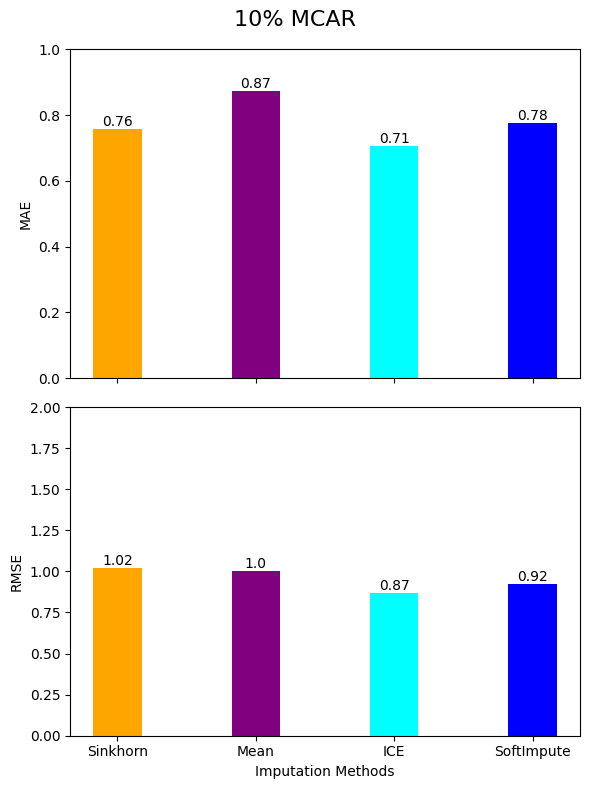

In [ ]:

# Define values and categories
values_mae_mcar10 = [sk_mae_mcar10, mean_mae_mcar10, ice_mae_mcar10, soft_mae_mcar10]
values_rmse_mcar10 = [sk_rmse_mcar10, mean_rmse_mcar10, ice_rmse_mcar10, soft_rmse_mcar10]
categories = ['Sinkhorn', 'Mean', 'ICE', 'SoftImpute']
colors = ['orange', 'purple', 'cyan', 'blue']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  # Index for positioning bars

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('10% MCAR', fontsize=16)

# Plot Mean MAE bars and add values on top
bars1 = ax1.bar(index, values_mae_mcar10, color=colors, width=bar_width)
ax1.set_ylabel("MAE")
ax1.set_ylim(0, 1)  
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot Mean RMSE bars and add values on top
bars2 = ax2.bar(index, values_rmse_mcar10, color=colors, width=bar_width)
ax2.set_ylabel("RMSE")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Label x-axis with categories
ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Imputation Methods')
plt.tight_layout()
plt.show()


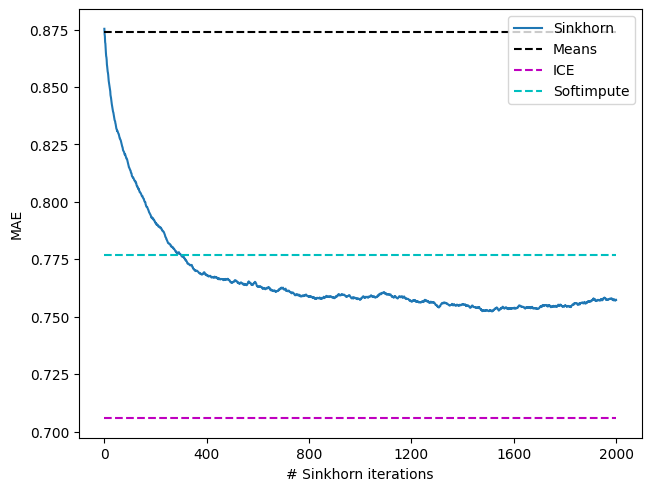

In [33]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_maes10mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_maes10mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_mae_mcar10, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_mae_mcar10, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_mae_mcar10, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('MAE')
plt.legend()
plt.show()

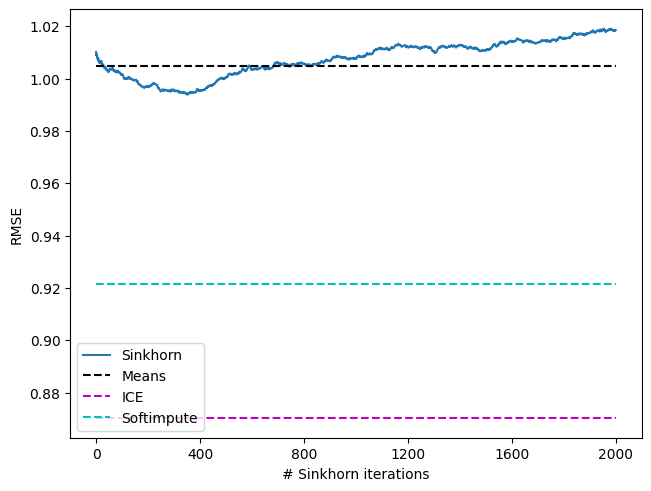

In [34]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_rmses10mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_rmses10mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_rmse_mcar10, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_rmse_mcar10, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_rmse_mcar10, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('RMSE')
plt.legend()
plt.show()

**15% MCAR**

In [35]:
#sinkhorn
n_mcar15, d_mcar15 = data_mcar15.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar15 = pick_epsilon(data_mcar15)

print(epsilon_mcar15)

sk_imputer_mcar15 = SinkhornImputation(eps=epsilon_mcar15, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mcar15, sk_maes15mcar, sk_rmses15mcar = sk_imputer_mcar15.fit_transform(data_mcar15, verbose=True, report_interval=500, X_true=ground_truth.clone())
#using numpy version of data
sk_imp_mcar15_numpy = sk_imp_mcar15.detach().cpu().numpy()

sk_mae_mcar15 = MAE(sk_imp_mcar15_numpy,ground_truth_numpy ,mask_mcar15)
sk_rmse_mcar15 = RMSE(sk_imp_mcar15_numpy, ground_truth_numpy,mask_mcar15)
print(sk_mae_mcar15,sk_rmse_mcar15)

INFO:root:batchsize = 128, epsilon = 0.5400


0.5399675278634788


INFO:root:Iteration 0:	 Loss: 3.3862	 Validation MAE: 0.8643	RMSE: 0.9976
INFO:root:Iteration 500:	 Loss: 3.3754	 Validation MAE: 0.7527	RMSE: 0.9874
INFO:root:Iteration 1000:	 Loss: 3.1490	 Validation MAE: 0.7445	RMSE: 0.9976
INFO:root:Iteration 1500:	 Loss: 3.7040	 Validation MAE: 0.7404	RMSE: 1.0006


0.742610752652881 1.0051713516413598


In [36]:
#mean
#using numpy version of data
mean_imp_mcar15 = SimpleImputer().fit_transform(data_mcar15_numpy)
mean_mae_mcar15 = MAE(mean_imp_mcar15, ground_truth_numpy, mask_mcar15)
mean_rmse_mcar15= RMSE(mean_imp_mcar15, ground_truth_numpy, mask_mcar15)
print(mean_mae_mcar15, mean_rmse_mcar15)

#ICE
ice_imp_mcar15 = IterativeImputer(random_state=0, max_iter=500).fit_transform(data_mcar15_numpy)
ice_mae_mcar15 = MAE(ice_imp_mcar15, ground_truth_numpy, mask_mcar15)
ice_rmse_mcar15 = RMSE(ice_imp_mcar15, ground_truth_numpy, mask_mcar15)
print(ice_mae_mcar15,ice_rmse_mcar15)

#SoftImpute
cv_error_mcar15, grid_lambda_mcar15 = cv_softimpute(data_mcar15_numpy, grid_len=15)
lbda_mcar15 = grid_lambda_mcar15[np.argmin(cv_error_mcar15)]
soft_imp_mcar15 = softimpute((data_mcar15_numpy), lbda_mcar15)[1]

soft_mae_mcar15 = MAE(soft_imp_mcar15, ground_truth_numpy, mask_mcar15)
soft_rmse_mcar15 = RMSE(soft_imp_mcar15, ground_truth_numpy, mask_mcar15)
print(soft_mae_mcar15,soft_rmse_mcar15)



0.8624201668765313 0.9935027668650974
0.7181673785105828 0.8831626475813527
0.7758018692784379 0.9194461051340633


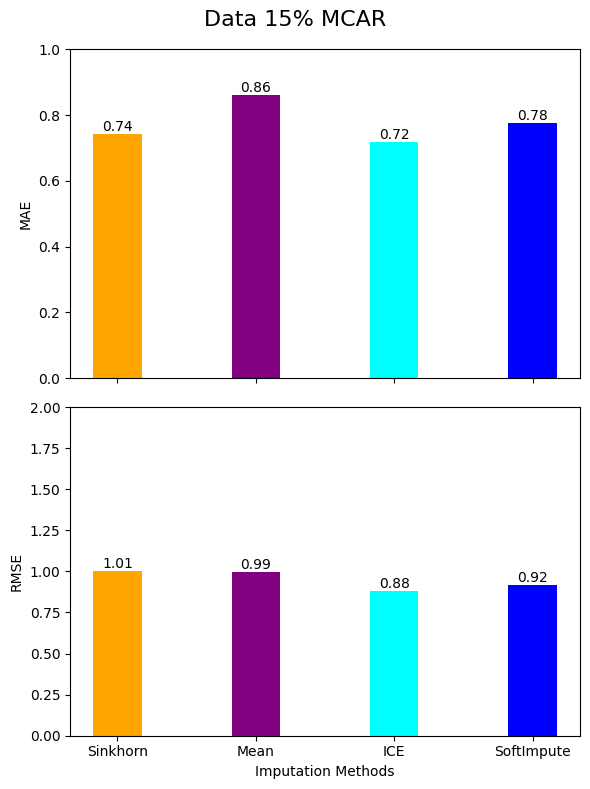

In [ ]:

# Define values and categories
values_mae_mcar15 = [sk_mae_mcar15, mean_mae_mcar15, ice_mae_mcar15, soft_mae_mcar15]
values_rmse_mcar15 = [sk_rmse_mcar15, mean_rmse_mcar15, ice_rmse_mcar15, soft_rmse_mcar15]
categories = ['Sinkhorn', 'Mean', 'ICE', 'SoftImpute']
colors = ['orange', 'purple', 'cyan', 'blue']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  # Index for positioning bars

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 15% MCAR', fontsize=16)

# Plot Mean MAE bars and add values on top
bars1 = ax1.bar(index, values_mae_mcar15, color=colors, width=bar_width)
ax1.set_ylabel("MAE")
ax1.set_ylim(0, 1)  
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot Mean RMSE bars and add values on top
bars2 = ax2.bar(index, values_rmse_mcar15, color=colors, width=bar_width)
ax2.set_ylabel("RMSE")
ax2.set_ylim(0, 2)  
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Label x-axis with categories
ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Imputation Methods')
plt.tight_layout()
plt.show()


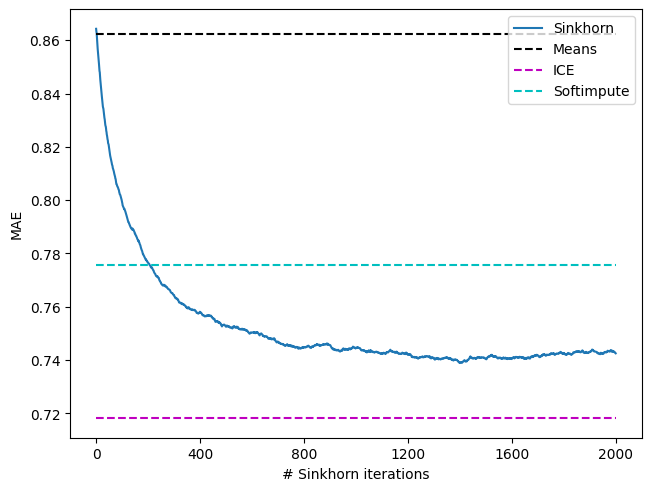

In [38]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_maes15mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_maes15mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_mae_mcar15, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_mae_mcar15, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_mae_mcar15, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('MAE')
plt.legend()
plt.show()

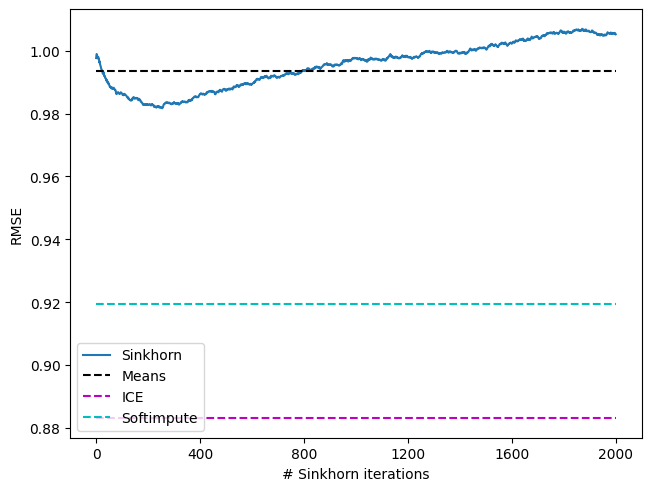

In [39]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_rmses15mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_rmses15mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_rmse_mcar15, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_rmse_mcar15, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_rmse_mcar15, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('RMSE')
plt.legend()
plt.show()

**20% MCAR**

In [40]:
#sinkhorn
n_mcar20, d_mcar20 = data_mcar20.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar20 = pick_epsilon(data_mcar20)

print(epsilon_mcar20)

sk_imputer_mcar20 = SinkhornImputation(eps=epsilon_mcar20, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mcar20, sk_maes20mcar, sk_rmses20mcar = sk_imputer_mcar20.fit_transform(data_mcar20, verbose=True, report_interval=500, X_true=ground_truth.clone())
#using numpy version of data
sk_imp_mcar20_numpy = sk_imp_mcar20.detach().cpu().numpy()

sk_mae_mcar20 = MAE(sk_imp_mcar20_numpy,ground_truth_numpy ,mask_mcar20)
sk_rmse_mcar20 = RMSE(sk_imp_mcar20_numpy, ground_truth_numpy,mask_mcar20)
print(sk_mae_mcar20,sk_rmse_mcar20)

INFO:root:batchsize = 128, epsilon = 0.5120
INFO:root:Iteration 0:	 Loss: 3.0124	 Validation MAE: 0.8637	RMSE: 1.0009


0.5119546369694804


INFO:root:Iteration 500:	 Loss: 3.1794	 Validation MAE: 0.7563	RMSE: 0.9989
INFO:root:Iteration 1000:	 Loss: 3.2412	 Validation MAE: 0.7479	RMSE: 1.0087
INFO:root:Iteration 1500:	 Loss: 2.9422	 Validation MAE: 0.7512	RMSE: 1.0181


0.7534824197501169 1.0240545164220054


In [41]:
#mean
#using numpy version of data
mean_imp_mcar20 = SimpleImputer().fit_transform(data_mcar20_numpy)
mean_mae_mcar20 = MAE(mean_imp_mcar20, ground_truth_numpy, mask_mcar20)
mean_rmse_mcar20= RMSE(mean_imp_mcar20, ground_truth_numpy, mask_mcar20)
print(mean_mae_mcar20, mean_rmse_mcar20)

#ICE
ice_imp_mcar20 = IterativeImputer(random_state=0, max_iter=500).fit_transform(data_mcar20_numpy)
ice_mae_mcar20 = MAE(ice_imp_mcar20, ground_truth_numpy, mask_mcar20)
ice_rmse_mcar20 = RMSE(ice_imp_mcar20, ground_truth_numpy, mask_mcar20)
print(ice_mae_mcar20,ice_rmse_mcar20)

#SoftImpute
cv_error_mcar20, grid_lambda_mcar20 = cv_softimpute(data_mcar20_numpy, grid_len=15)
lbda_mcar20 = grid_lambda_mcar20[np.argmin(cv_error_mcar20)]
soft_imp_mcar20 = softimpute((data_mcar20_numpy), lbda_mcar20)[1]

soft_mae_mcar20 = MAE(soft_imp_mcar20, ground_truth_numpy, mask_mcar20)
soft_rmse_mcar20 = RMSE(soft_imp_mcar20, ground_truth_numpy, mask_mcar20)
print(soft_mae_mcar20,soft_rmse_mcar20)

0.8626358761026232 0.995781747350224
0.7378042355449242 0.9074041517085818
0.780656950399619 0.9251874195905628


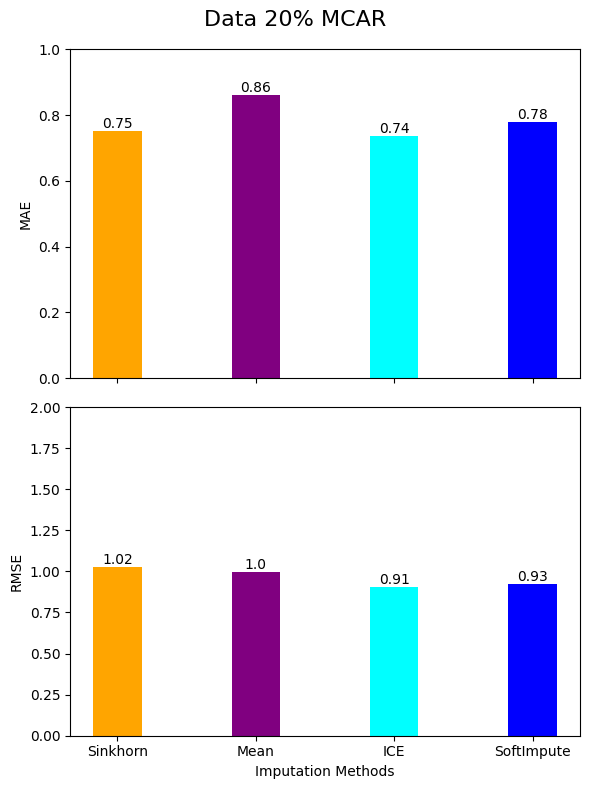

In [ ]:

# Define values and categories
values_mae_mcar20 = [sk_mae_mcar20, mean_mae_mcar20, ice_mae_mcar20, soft_mae_mcar20]
values_rmse_mcar20 = [sk_rmse_mcar20, mean_rmse_mcar20, ice_rmse_mcar20, soft_rmse_mcar20]
categories = ['Sinkhorn', 'Mean', 'ICE', 'SoftImpute']
colors = ['orange', 'purple', 'cyan', 'blue']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  # Index for positioning bars

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 20% MCAR', fontsize=16)

# Plot Mean MAE bars and add values on top
bars1 = ax1.bar(index, values_mae_mcar20, color=colors, width=bar_width)
ax1.set_ylabel("MAE")
ax1.set_ylim(0, 1)  
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot Mean RMSE bars and add values on top
bars2 = ax2.bar(index, values_rmse_mcar20, color=colors, width=bar_width)
ax2.set_ylabel("RMSE")
ax2.set_ylim(0, 2)  
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Label x-axis with categories
ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Imputation Methods')
plt.tight_layout()
plt.show()


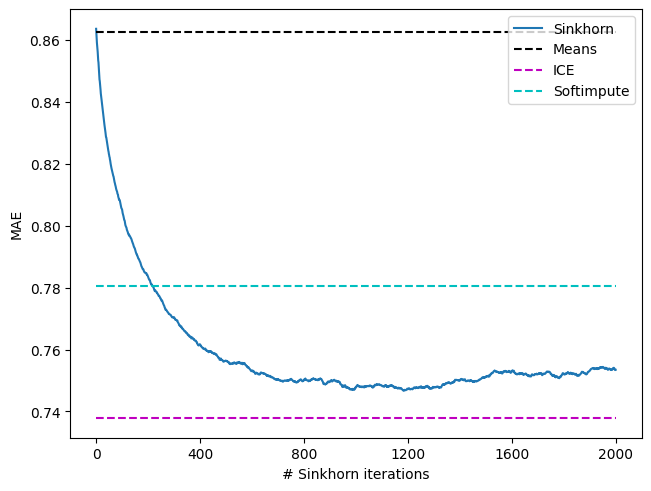

In [43]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_maes20mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_maes20mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_mae_mcar20, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_mae_mcar20, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_mae_mcar20, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('MAE')
plt.legend()
plt.show()

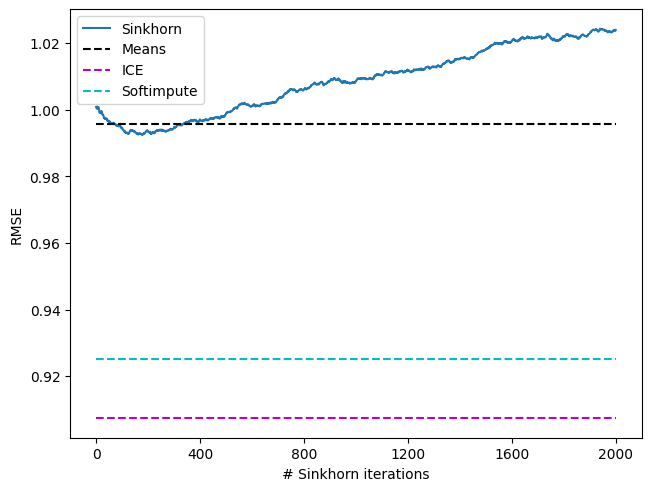

In [44]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_rmses20mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_rmses20mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_rmse_mcar20, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_rmse_mcar20, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_rmse_mcar20, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('RMSE')
plt.legend()
plt.show()

**25% MCAR**

In [45]:
#sinkhorn
n_mcar25, d_mcar25 = data_mcar25.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar25 = pick_epsilon(data_mcar25)

print(epsilon_mcar25)

sk_imputer_mcar25 = SinkhornImputation(eps=epsilon_mcar25, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mcar25, sk_maes25mcar, sk_rmses25mcar = sk_imputer_mcar25.fit_transform(data_mcar25, verbose=True, report_interval=500, X_true=ground_truth.clone())
#using numpy version of data
sk_imp_mcar25_numpy = sk_imp_mcar25.detach().cpu().numpy()

sk_mae_mcar25 = MAE(sk_imp_mcar25_numpy,ground_truth_numpy ,mask_mcar25)
sk_rmse_mcar25 = RMSE(sk_imp_mcar25_numpy, ground_truth_numpy,mask_mcar25)
print(sk_mae_mcar25,sk_rmse_mcar25)

INFO:root:batchsize = 128, epsilon = 0.4776


0.4776402401285109


INFO:root:Iteration 0:	 Loss: 3.1087	 Validation MAE: 0.8711	RMSE: 1.0068
INFO:root:Iteration 500:	 Loss: 3.1008	 Validation MAE: 0.7618	RMSE: 1.0059
INFO:root:Iteration 1000:	 Loss: 2.8929	 Validation MAE: 0.7511	RMSE: 1.0172
INFO:root:Iteration 1500:	 Loss: 3.0206	 Validation MAE: 0.7571	RMSE: 1.0278


0.756547363665818 1.0313150264895012


In [46]:
#mean
#using numpy version of data
mean_imp_mcar25 = SimpleImputer().fit_transform(data_mcar25_numpy)
mean_mae_mcar25 = MAE(mean_imp_mcar25, ground_truth_numpy, mask_mcar25)
mean_rmse_mcar25= RMSE(mean_imp_mcar25, ground_truth_numpy, mask_mcar25)
print(mean_mae_mcar25, mean_rmse_mcar25)

#ICE
ice_imp_mcar25 = IterativeImputer(random_state=0, max_iter=500).fit_transform(data_mcar25_numpy)
ice_mae_mcar25 = MAE(ice_imp_mcar25, ground_truth_numpy, mask_mcar25)
ice_rmse_mcar25 = RMSE(ice_imp_mcar25, ground_truth_numpy, mask_mcar25)
print(ice_mae_mcar25,ice_rmse_mcar25)

#SoftImpute
cv_error_mcar25, grid_lambda_mcar25 = cv_softimpute(data_mcar25_numpy, grid_len=15)
lbda_mcar25 = grid_lambda_mcar25[np.argmin(cv_error_mcar25)]
soft_imp_mcar25 = softimpute((data_mcar25_numpy), lbda_mcar25)[1]

soft_mae_mcar25 = MAE(soft_imp_mcar25, ground_truth_numpy, mask_mcar25)
soft_rmse_mcar25 = RMSE(soft_imp_mcar25, ground_truth_numpy, mask_mcar25)
print(soft_mae_mcar25,soft_rmse_mcar25)

0.8682106177121484 1.0007630233025628
0.7678691107667235 0.9392699811043358
0.8000702395223818 0.9418310983069198


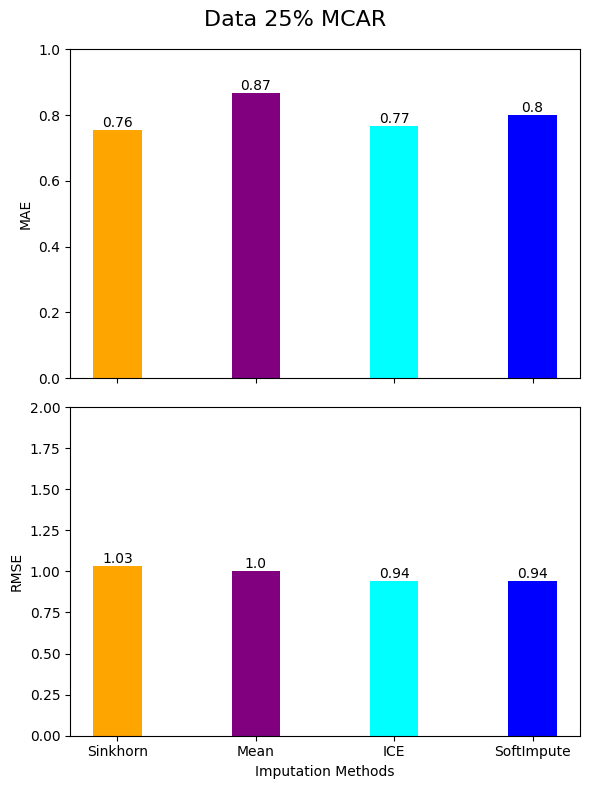

In [ ]:

# Define values and categories
values_mae_mcar25 = [sk_mae_mcar25, mean_mae_mcar25, ice_mae_mcar25, soft_mae_mcar25]
values_rmse_mcar25 = [sk_rmse_mcar25, mean_rmse_mcar25, ice_rmse_mcar25, soft_rmse_mcar25]
categories = ['Sinkhorn', 'Mean', 'ICE', 'SoftImpute']
colors = ['orange', 'purple', 'cyan', 'blue']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  # Index for positioning bars

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MCAR', fontsize=16)

# Plot Mean MAE bars and add values on top
bars1 = ax1.bar(index, values_mae_mcar25, color=colors, width=bar_width)
ax1.set_ylabel("MAE")
ax1.set_ylim(0, 1)  
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot Mean RMSE bars and add values on top
bars2 = ax2.bar(index, values_rmse_mcar25, color=colors, width=bar_width)
ax2.set_ylabel("RMSE")
ax2.set_ylim(0, 2)  
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Label x-axis with categories
ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Imputation Methods')
plt.tight_layout()
plt.show()


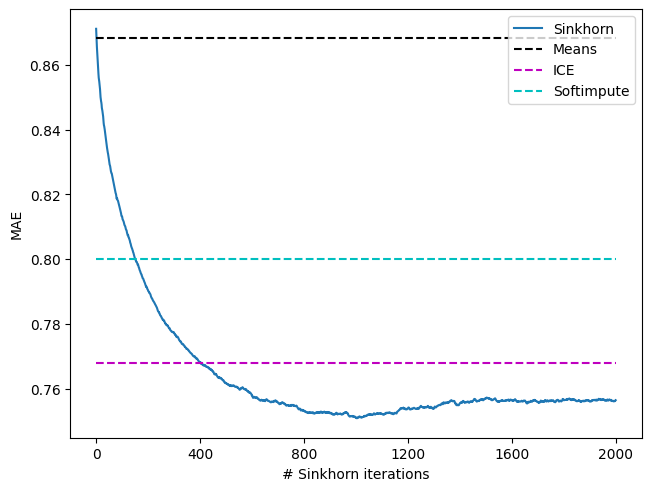

In [48]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_maes25mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_maes25mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_mae_mcar25, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_mae_mcar25, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_mae_mcar25, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('MAE')
plt.legend()
plt.show()

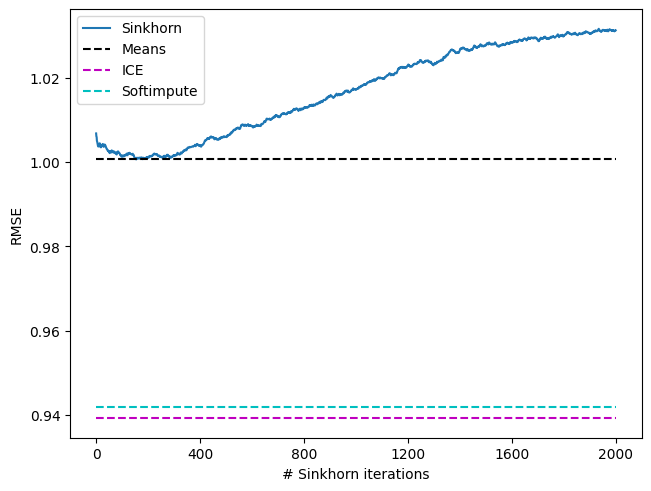

In [49]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_rmses25mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_rmses25mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_rmse_mcar25, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_rmse_mcar25, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_rmse_mcar25, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('RMSE')
plt.legend()
plt.show()

**30% MCAR**

In [50]:
#sinkhorn
n_mcar30, d_mcar30 = data_mcar30.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar30 = pick_epsilon(data_mcar30)
print(epsilon_mcar30)

sk_imputer_mcar30 = SinkhornImputation(eps=epsilon_mcar30, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mcar30, sk_maes30mcar, sk_rmses30mcar = sk_imputer_mcar30.fit_transform(data_mcar30, verbose=True, report_interval=500, X_true=ground_truth.clone())
#using numpy version of data
sk_imp_mcar30_numpy = sk_imp_mcar30.detach().cpu().numpy()

sk_mae_mcar30 = MAE(sk_imp_mcar30_numpy,ground_truth_numpy ,mask_mcar30)
sk_rmse_mcar30 = RMSE(sk_imp_mcar30_numpy, ground_truth_numpy,mask_mcar30)
print(sk_mae_mcar30,sk_rmse_mcar30)

INFO:root:batchsize = 128, epsilon = 0.4415
INFO:root:Iteration 0:	 Loss: 2.6739	 Validation MAE: 0.8671	RMSE: 1.0039


0.4415187668006983


INFO:root:Iteration 500:	 Loss: 2.6023	 Validation MAE: 0.7621	RMSE: 1.0098
INFO:root:Iteration 1000:	 Loss: 2.2945	 Validation MAE: 0.7542	RMSE: 1.0218
INFO:root:Iteration 1500:	 Loss: 2.5981	 Validation MAE: 0.7529	RMSE: 1.0288


0.7549684517951374 1.0342101740952934


In [51]:
#mean
#using numpy version of data
mean_imp_mcar30 = SimpleImputer().fit_transform(data_mcar30_numpy)
mean_mae_mcar30 = MAE(mean_imp_mcar30, ground_truth_numpy, mask_mcar30)
mean_rmse_mcar30= RMSE(mean_imp_mcar30, ground_truth_numpy, mask_mcar30)
print(mean_mae_mcar30, mean_rmse_mcar30)

#ICE
ice_imp_mcar30 = IterativeImputer(random_state=0, max_iter=500).fit_transform(data_mcar30_numpy)
ice_mae_mcar30 = MAE(ice_imp_mcar30, ground_truth_numpy, mask_mcar30)
ice_rmse_mcar30 = RMSE(ice_imp_mcar30, ground_truth_numpy, mask_mcar30)
print(ice_mae_mcar30,ice_rmse_mcar30)

#SoftImpute
cv_error_mcar30, grid_lambda_mcar30 = cv_softimpute(data_mcar30_numpy, grid_len=15)
lbda_mcar30 = grid_lambda_mcar30[np.argmin(cv_error_mcar30)]
soft_imp_mcar30 = softimpute((data_mcar30_numpy), lbda_mcar30)[1]

soft_mae_mcar30 = MAE(soft_imp_mcar30, ground_truth_numpy, mask_mcar30)
soft_rmse_mcar30 = RMSE(soft_imp_mcar30, ground_truth_numpy, mask_mcar30)
print(soft_mae_mcar30,soft_rmse_mcar30)

0.8654027440054811 0.998253597951087


0.8099653780723958 1.007510133203167
0.7957171169591597 0.939593123361696


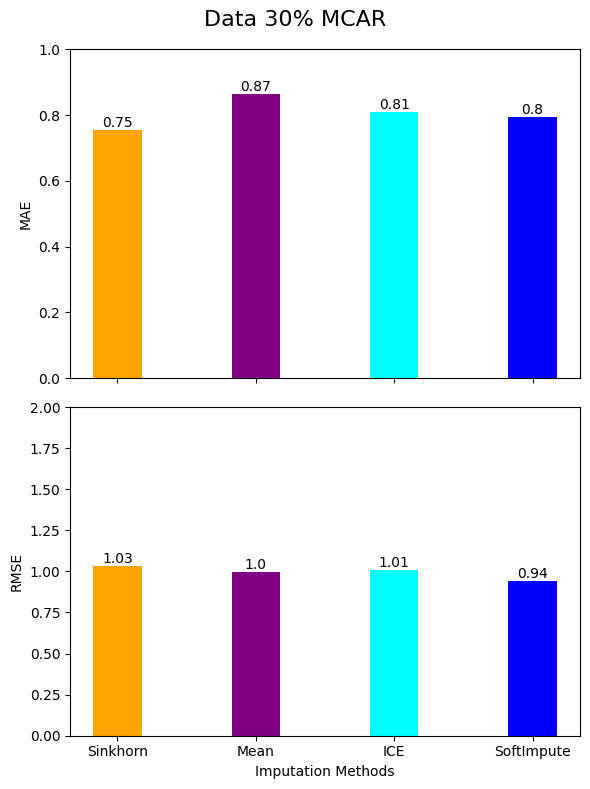

In [ ]:

# Define values and categories
values_mae_mcar30 = [sk_mae_mcar30, mean_mae_mcar30, ice_mae_mcar30, soft_mae_mcar30]
values_rmse_mcar30 = [sk_rmse_mcar30, mean_rmse_mcar30, ice_rmse_mcar30, soft_rmse_mcar30]
categories = ['Sinkhorn', 'Mean', 'ICE', 'SoftImpute']
colors = ['orange', 'purple', 'cyan', 'blue']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  # Index for positioning bars

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 30% MCAR', fontsize=16)

# Plot Mean MAE bars and add values on top
bars1 = ax1.bar(index, values_mae_mcar30, color=colors, width=bar_width)
ax1.set_ylabel("MAE")
ax1.set_ylim(0, 1)  
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot Mean RMSE bars and add values on top
bars2 = ax2.bar(index, values_rmse_mcar30, color=colors, width=bar_width)
ax2.set_ylabel("RMSE")
ax2.set_ylim(0, 2)  
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Label x-axis with categories
ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Imputation Methods')
plt.tight_layout()
plt.show()


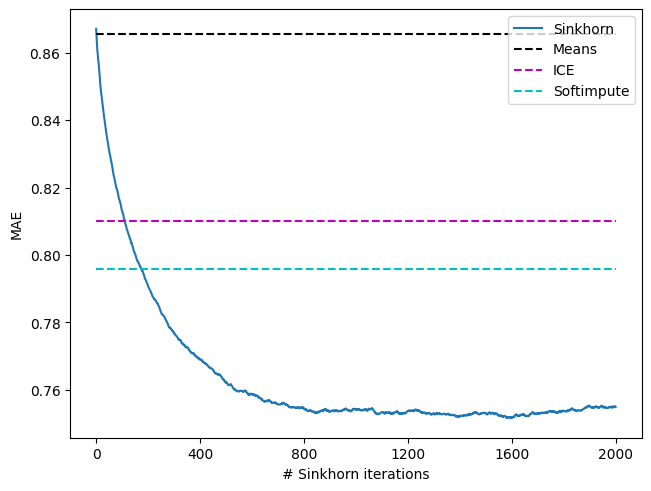

In [53]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_maes30mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_maes30mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_mae_mcar30, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_mae_mcar30, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_mae_mcar30, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('MAE')
plt.legend()
plt.show()

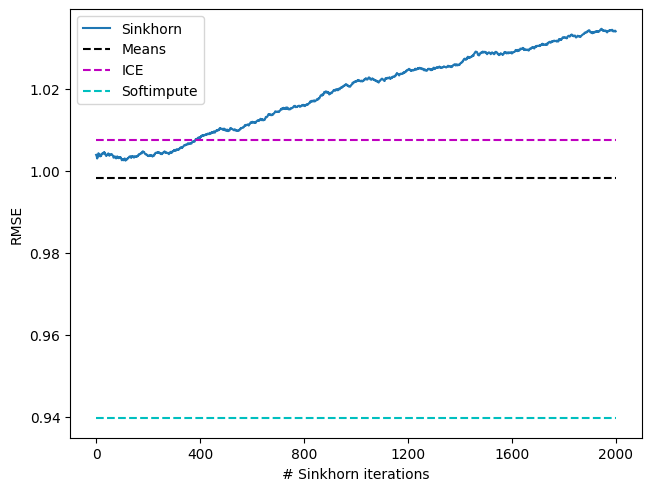

In [54]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_rmses30mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_rmses30mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_rmse_mcar30, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_rmse_mcar30, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_rmse_mcar30, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('RMSE')
plt.legend()
plt.show()

**35% MCAR**

In [55]:
#sinkhorn
n_mcar35, d_mcar35 = data_mcar35.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar35 = pick_epsilon(data_mcar35)

print(epsilon_mcar35)

sk_imputer_mcar35 = SinkhornImputation(eps=epsilon_mcar35, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mcar35, sk_maes35mcar, sk_rmses35mcar = sk_imputer_mcar35.fit_transform(data_mcar35, verbose=True, report_interval=500, X_true=ground_truth.clone())
#using numpy version of data
sk_imp_mcar35_numpy = sk_imp_mcar35.detach().cpu().numpy()

sk_mae_mcar35 = MAE(sk_imp_mcar35_numpy,ground_truth_numpy ,mask_mcar35)
sk_rmse_mcar35 = RMSE(sk_imp_mcar35_numpy, ground_truth_numpy,mask_mcar35)
print(sk_mae_mcar35,sk_rmse_mcar35)

INFO:root:batchsize = 128, epsilon = 0.4072
INFO:root:Iteration 0:	 Loss: 2.9056	 Validation MAE: 0.8674	RMSE: 1.0035


0.40721730824189883


INFO:root:Iteration 500:	 Loss: 2.2463	 Validation MAE: 0.7643	RMSE: 1.0115
INFO:root:Iteration 1000:	 Loss: 2.6146	 Validation MAE: 0.7535	RMSE: 1.0212
INFO:root:Iteration 1500:	 Loss: 2.4953	 Validation MAE: 0.7517	RMSE: 1.0278


0.7540442458185728 1.0360063213350417


In [56]:
#mean
#using numpy version of data
mean_imp_mcar35 = SimpleImputer().fit_transform(data_mcar35_numpy)
mean_mae_mcar35 = MAE(mean_imp_mcar35, ground_truth_numpy, mask_mcar35)
mean_rmse_mcar35 = RMSE(mean_imp_mcar35, ground_truth_numpy, mask_mcar35)
print(mean_mae_mcar35, mean_rmse_mcar35)

#ICE
ice_imp_mcar35 = IterativeImputer(random_state=0, max_iter=500).fit_transform(data_mcar35_numpy)
ice_mae_mcar35 = MAE(ice_imp_mcar35, ground_truth_numpy, mask_mcar35)
ice_rmse_mcar35 = RMSE(ice_imp_mcar35, ground_truth_numpy, mask_mcar35)
print(ice_mae_mcar35,ice_rmse_mcar35)

#SoftImpute
cv_error_mcar35, grid_lambda_mcar35 = cv_softimpute(data_mcar35_numpy, grid_len=15)
lbda_mcar35 = grid_lambda_mcar35[np.argmin(cv_error_mcar35)]
soft_imp_mcar35 = softimpute((data_mcar35_numpy), lbda_mcar35)[1]

soft_mae_mcar35 = MAE(soft_imp_mcar35, ground_truth_numpy, mask_mcar35)
soft_rmse_mcar35 = RMSE(soft_imp_mcar35, ground_truth_numpy, mask_mcar35)
print(soft_mae_mcar35,soft_rmse_mcar35)

0.8655730347336128 0.9978792033822417


c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


0.8308229770533024 1.033970683378866
0.8064439470720093 0.9474889071546027


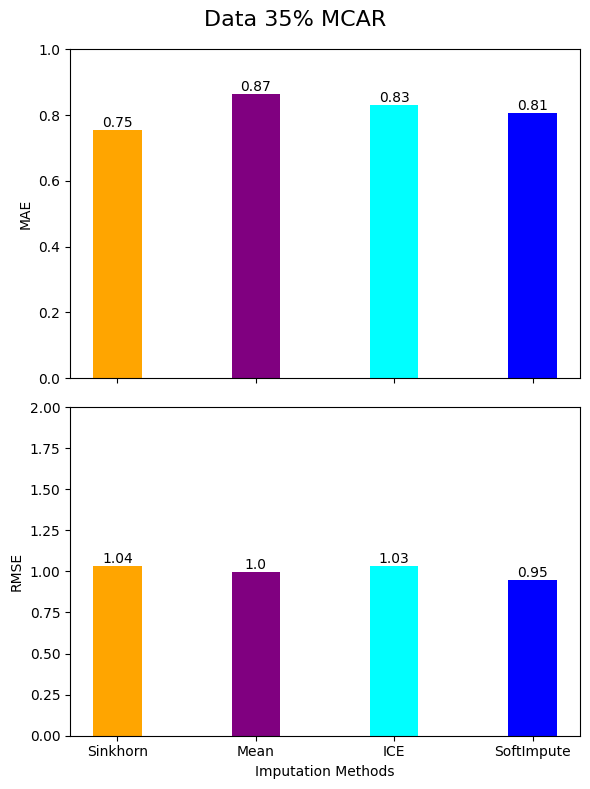

In [ ]:

# Define values and categories
values_mae_mcar35 = [sk_mae_mcar35, mean_mae_mcar35, ice_mae_mcar35, soft_mae_mcar35]
values_rmse_mcar35 = [sk_rmse_mcar35, mean_rmse_mcar35, ice_rmse_mcar35, soft_rmse_mcar35]
categories = ['Sinkhorn', 'Mean', 'ICE', 'SoftImpute']
colors = ['orange', 'purple', 'cyan', 'blue']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  # Index for positioning bars

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 35% MCAR', fontsize=16)

# Plot Mean MAE bars and add values on top
bars1 = ax1.bar(index, values_mae_mcar35, color=colors, width=bar_width)
ax1.set_ylabel("MAE")
ax1.set_ylim(0, 1)  
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot Mean RMSE bars and add values on top
bars2 = ax2.bar(index, values_rmse_mcar35, color=colors, width=bar_width)
ax2.set_ylabel("RMSE")
ax2.set_ylim(0, 2)  
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Label x-axis with categories
ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Imputation Methods')
plt.tight_layout()
plt.show()


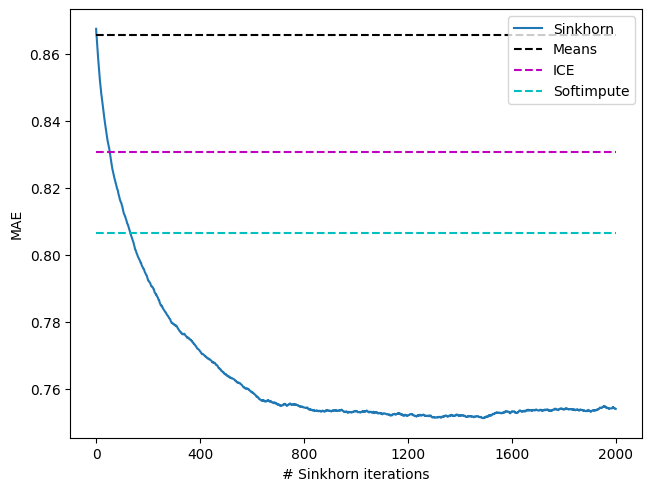

In [58]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_maes35mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_maes35mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_mae_mcar35, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_mae_mcar35, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_mae_mcar35, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('MAE')
plt.legend()
plt.show()

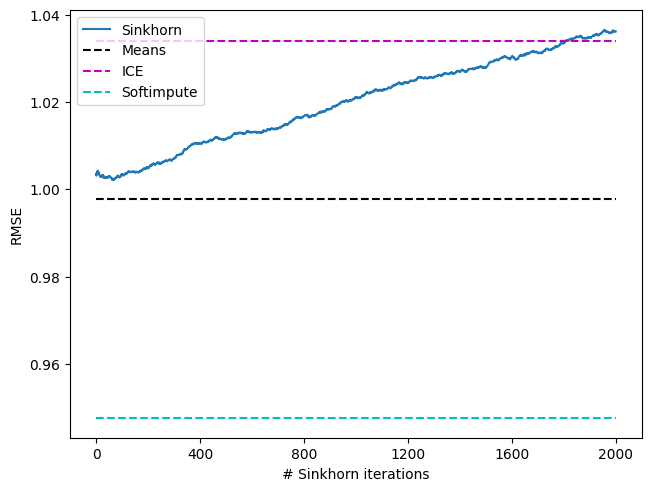

In [59]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_rmses35mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_rmses35mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_rmse_mcar35, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_rmse_mcar35, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_rmse_mcar35, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('RMSE')
plt.legend()
plt.show()

**40% MCAR**

In [60]:
#sinkhorn
n_mcar40, d_mcar40 = data_mcar40.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar40 = pick_epsilon(data_mcar40)

print(epsilon_mcar40)

sk_imputer_mcar40 = SinkhornImputation(eps=epsilon_mcar40, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mcar40, sk_maes40mcar, sk_rmses40mcar = sk_imputer_mcar40.fit_transform(data_mcar40, verbose=True, report_interval=500, X_true=ground_truth.clone())
#using numpy version of data
sk_imp_mcar40_numpy = sk_imp_mcar40.detach().cpu().numpy()

sk_mae_mcar40 = MAE(sk_imp_mcar40_numpy,ground_truth_numpy ,mask_mcar40)
sk_rmse_mcar40 = RMSE(sk_imp_mcar40_numpy, ground_truth_numpy,mask_mcar40)
print(sk_mae_mcar40,sk_rmse_mcar40)

INFO:root:batchsize = 128, epsilon = 0.3714


0.3714078298729495


INFO:root:Iteration 0:	 Loss: 2.6178	 Validation MAE: 0.8675	RMSE: 1.0054
INFO:root:Iteration 500:	 Loss: 2.2529	 Validation MAE: 0.7714	RMSE: 1.0190
INFO:root:Iteration 1000:	 Loss: 2.2638	 Validation MAE: 0.7605	RMSE: 1.0321
INFO:root:Iteration 1500:	 Loss: 2.3255	 Validation MAE: 0.7604	RMSE: 1.0422


0.7634633967475517 1.0499047171589702


In [61]:
#mean
#using numpy version of data
mean_imp_mcar40 = SimpleImputer().fit_transform(data_mcar40_numpy)
mean_mae_mcar40 = MAE(mean_imp_mcar40, ground_truth_numpy, mask_mcar40)
mean_rmse_mcar40= RMSE(mean_imp_mcar40, ground_truth_numpy, mask_mcar40)
print(mean_mae_mcar40, mean_rmse_mcar40)

#ICE
ice_imp_mcar40 = IterativeImputer(random_state=0, max_iter=500).fit_transform(data_mcar40_numpy)
ice_mae_mcar40 = MAE(ice_imp_mcar40, ground_truth_numpy, mask_mcar40)
ice_rmse_mcar40 = RMSE(ice_imp_mcar40, ground_truth_numpy, mask_mcar40)
print(ice_mae_mcar40,ice_rmse_mcar40)

#SoftImpute
cv_error_mcar40, grid_lambda_mcar40 = cv_softimpute(data_mcar40_numpy, grid_len=15)
lbda_mcar40 = grid_lambda_mcar40[np.argmin(cv_error_mcar40)]
soft_imp_mcar40 = softimpute((data_mcar40_numpy), lbda_mcar40)[1]

soft_mae_mcar40 = MAE(soft_imp_mcar40, ground_truth_numpy, mask_mcar40)
soft_rmse_mcar40 = RMSE(soft_imp_mcar40, ground_truth_numpy, mask_mcar40)
print(soft_mae_mcar40,soft_rmse_mcar40)

0.8669120593562448 1.000210591490987


c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


0.8340743330180584 1.0430360840567336
0.8118632743516528 0.9544416832023199


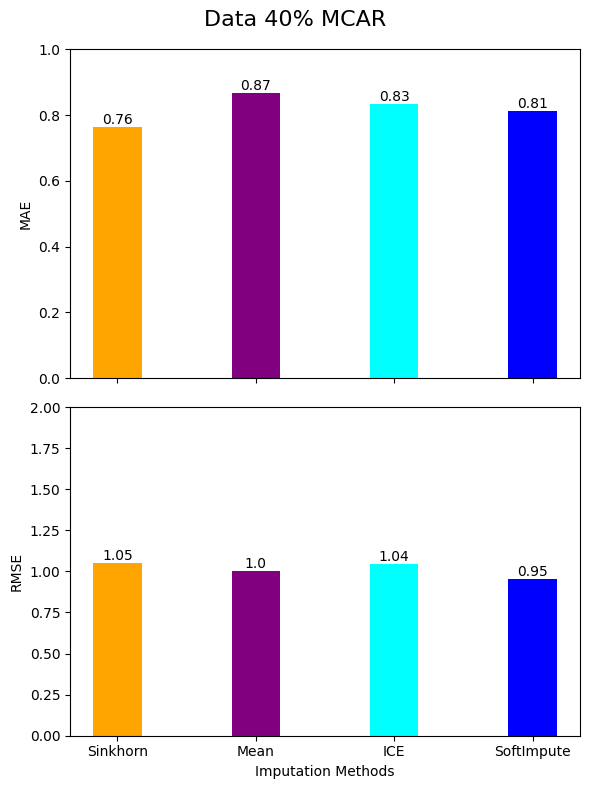

In [ ]:

# Define values and categories
values_mae_mcar40 = [sk_mae_mcar40, mean_mae_mcar40, ice_mae_mcar40, soft_mae_mcar40]
values_rmse_mcar40 = [sk_rmse_mcar40, mean_rmse_mcar40, ice_rmse_mcar40, soft_rmse_mcar40]
categories = ['Sinkhorn', 'Mean', 'ICE', 'SoftImpute']
colors = ['orange', 'purple', 'cyan', 'blue']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  # Index for positioning bars

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 40% MCAR', fontsize=16)

# Plot Mean MAE bars and add values on top
bars1 = ax1.bar(index, values_mae_mcar40, color=colors, width=bar_width)
ax1.set_ylabel("MAE")
ax1.set_ylim(0, 1)  
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot Mean RMSE bars and add values on top
bars2 = ax2.bar(index, values_rmse_mcar40, color=colors, width=bar_width)
ax2.set_ylabel("RMSE")
ax2.set_ylim(0, 2)  
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Label x-axis with categories
ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Imputation Methods')
plt.tight_layout()
plt.show()


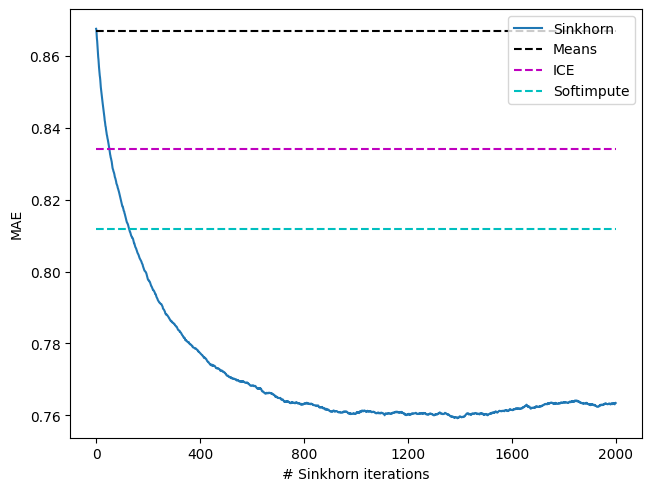

In [63]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_maes40mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_maes40mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_mae_mcar40, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_mae_mcar40, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_mae_mcar40, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('MAE')
plt.legend()
plt.show()

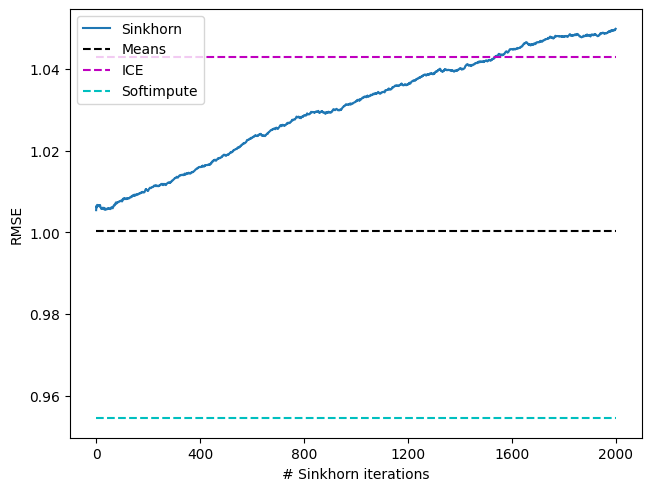

In [64]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_rmses40mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_rmses40mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_rmse_mcar40, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_rmse_mcar40, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_rmse_mcar40, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('RMSE')
plt.legend()
plt.show()

**45% MCAR**

In [65]:
#sinkhorn
n_mcar45, d_mcar45 = data_mcar45.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar45 = pick_epsilon(data_mcar45)

print(epsilon_mcar45)

sk_imputer_mcar45 = SinkhornImputation(eps=epsilon_mcar45, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mcar45, sk_maes45mcar, sk_rmses45mcar = sk_imputer_mcar45.fit_transform(data_mcar45, verbose=True, report_interval=500, X_true=ground_truth.clone())
#using numpy version of data
sk_imp_mcar45_numpy = sk_imp_mcar45.detach().cpu().numpy()

sk_mae_mcar45 = MAE(sk_imp_mcar45_numpy,ground_truth_numpy ,mask_mcar45)
sk_rmse_mcar45 = RMSE(sk_imp_mcar45_numpy, ground_truth_numpy,mask_mcar45)
print(sk_mae_mcar45,sk_rmse_mcar45)

INFO:root:batchsize = 128, epsilon = 0.3346


0.33456124954861766


INFO:root:Iteration 0:	 Loss: 2.1819	 Validation MAE: 0.8679	RMSE: 1.0066
INFO:root:Iteration 500:	 Loss: 2.3787	 Validation MAE: 0.7759	RMSE: 1.0259
INFO:root:Iteration 1000:	 Loss: 2.0622	 Validation MAE: 0.7677	RMSE: 1.0422
INFO:root:Iteration 1500:	 Loss: 1.9647	 Validation MAE: 0.7661	RMSE: 1.0515


0.7710005063871714 1.062484532729219


In [66]:
#mean
#using numpy version of data
mean_imp_mcar45 = SimpleImputer().fit_transform(data_mcar45_numpy)
mean_mae_mcar45 = MAE(mean_imp_mcar45, ground_truth_numpy, mask_mcar45)
mean_rmse_mcar45= RMSE(mean_imp_mcar45, ground_truth_numpy, mask_mcar45)
print(mean_mae_mcar45, mean_rmse_mcar45)

#ICE
ice_imp_mcar45 = IterativeImputer(random_state=0, max_iter=500).fit_transform(data_mcar45_numpy)
ice_mae_mcar45 = MAE(ice_imp_mcar45, ground_truth_numpy, mask_mcar45)
ice_rmse_mcar45 = RMSE(ice_imp_mcar45, ground_truth_numpy, mask_mcar45)
print(ice_mae_mcar45,ice_rmse_mcar45)

#SoftImpute
cv_error_mcar45, grid_lambda_mcar45 = cv_softimpute(data_mcar45_numpy, grid_len=15)
lbda_mcar45 = grid_lambda_mcar45[np.argmin(cv_error_mcar45)]
soft_imp_mcar45 = softimpute((data_mcar45_numpy), lbda_mcar45)[1]

soft_mae_mcar45 = MAE(soft_imp_mcar45, ground_truth_numpy, mask_mcar45)
soft_rmse_mcar45 = RMSE(soft_imp_mcar45, ground_truth_numpy, mask_mcar45)
print(soft_mae_mcar45,soft_rmse_mcar45)

0.8671908189297598 1.0018922734330267
0.8216061131626491 1.0404836834867943
0.8198641209246125 0.9618529812304616


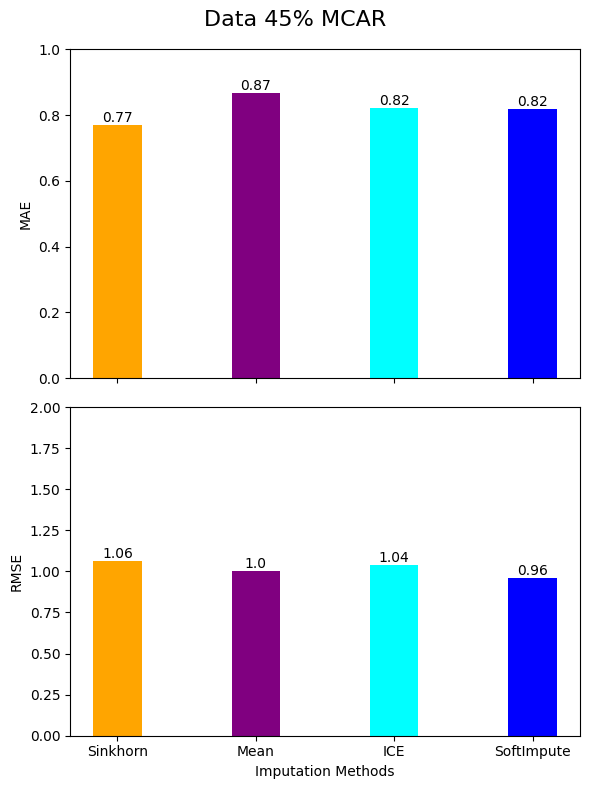

In [ ]:

# Define values and categories
values_mae_mcar45 = [sk_mae_mcar45, mean_mae_mcar45, ice_mae_mcar45, soft_mae_mcar45]
values_rmse_mcar45 = [sk_rmse_mcar45, mean_rmse_mcar45, ice_rmse_mcar45, soft_rmse_mcar45]
categories = ['Sinkhorn', 'Mean', 'ICE', 'SoftImpute']
colors = ['orange', 'purple', 'cyan', 'blue']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  # Index for positioning bars

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 45% MCAR', fontsize=16)

# Plot Mean MAE bars and add values on top
bars1 = ax1.bar(index, values_mae_mcar45, color=colors, width=bar_width)
ax1.set_ylabel("MAE")
ax1.set_ylim(0, 1)  
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot Mean RMSE bars and add values on top
bars2 = ax2.bar(index, values_rmse_mcar45, color=colors, width=bar_width)
ax2.set_ylabel("RMSE")
ax2.set_ylim(0, 2)  
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Label x-axis with categories
ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Imputation Methods')
plt.tight_layout()
plt.show()


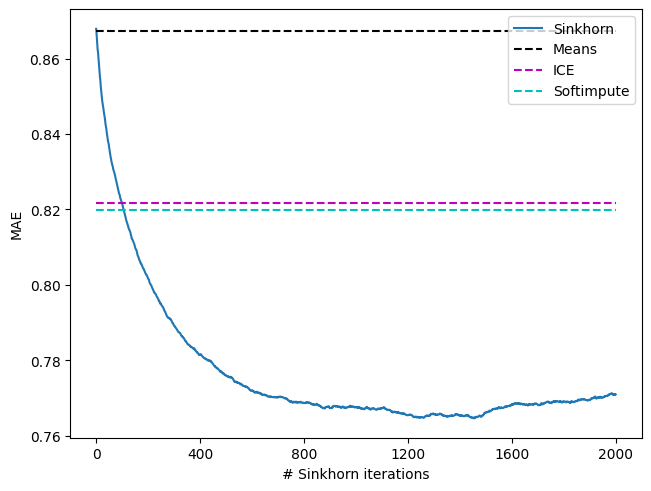

In [68]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_maes45mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_maes45mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_mae_mcar45, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_mae_mcar45, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_mae_mcar45, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('MAE')
plt.legend()
plt.show()

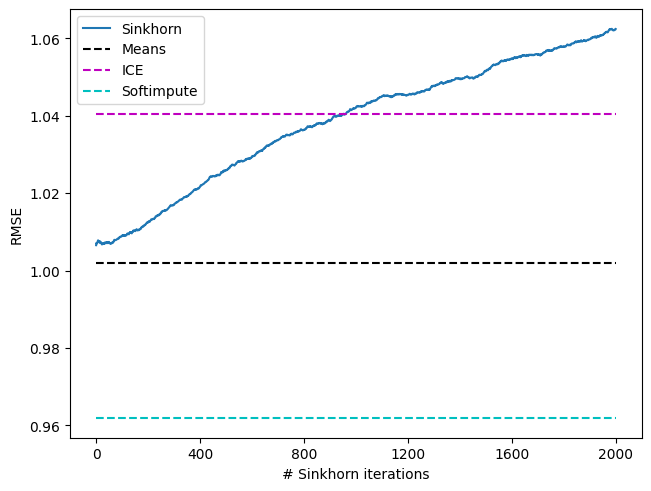

In [69]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_rmses45mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_rmses45mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_rmse_mcar45, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_rmse_mcar45, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_rmse_mcar45, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('RMSE')
plt.legend()
plt.show()

**50% MCAR**

In [70]:
#sinkhorn
n_mcar50, d_mcar50 = data_mcar50.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar50 = pick_epsilon(data_mcar50)

print(epsilon_mcar50)

sk_imputer_mcar50 = SinkhornImputation(eps=epsilon_mcar50, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mcar50, sk_maes50mcar, sk_rmses50mcar = sk_imputer_mcar50.fit_transform(data_mcar50, verbose=True, report_interval=500, X_true=ground_truth.clone())
#using numpy version of data
sk_imp_mcar50_numpy = sk_imp_mcar50.detach().cpu().numpy()

sk_mae_mcar50 = MAE(sk_imp_mcar50_numpy,ground_truth_numpy ,mask_mcar50)
sk_rmse_mcar50 = RMSE(sk_imp_mcar50_numpy, ground_truth_numpy,mask_mcar50)
print(sk_mae_mcar50,sk_rmse_mcar50)

INFO:root:batchsize = 128, epsilon = 0.2991


0.2991425289799529


INFO:root:Iteration 0:	 Loss: 2.1900	 Validation MAE: 0.8673	RMSE: 1.0060
INFO:root:Iteration 500:	 Loss: 1.8589	 Validation MAE: 0.7790	RMSE: 1.0263
INFO:root:Iteration 1000:	 Loss: 1.8043	 Validation MAE: 0.7641	RMSE: 1.0387
INFO:root:Iteration 1500:	 Loss: 1.8662	 Validation MAE: 0.7656	RMSE: 1.0503


0.7679678641747716 1.0596558842432742


In [71]:
#mean
#using numpy version of data
mean_imp_mcar50 = SimpleImputer().fit_transform(data_mcar50_numpy)
mean_mae_mcar50 = MAE(mean_imp_mcar50, ground_truth_numpy, mask_mcar50)
mean_rmse_mcar50= RMSE(mean_imp_mcar50, ground_truth_numpy, mask_mcar50)
print(mean_mae_mcar50, mean_rmse_mcar50)

#ICE
ice_imp_mcar50 = IterativeImputer(random_state=0, max_iter=500).fit_transform(data_mcar50_numpy)
ice_mae_mcar50 = MAE(ice_imp_mcar50, ground_truth_numpy, mask_mcar50)
ice_rmse_mcar50 = RMSE(ice_imp_mcar50, ground_truth_numpy, mask_mcar50)
print(ice_mae_mcar50,ice_rmse_mcar50)

#SoftImpute
cv_error_mcar50, grid_lambda_mcar50 = cv_softimpute(data_mcar50_numpy, grid_len=15)
lbda_mcar50 = grid_lambda_mcar50[np.argmin(cv_error_mcar50)]
soft_imp_mcar50 = softimpute((data_mcar50_numpy), lbda_mcar50)[1]

soft_mae_mcar50 = MAE(soft_imp_mcar50, ground_truth_numpy, mask_mcar50)
soft_rmse_mcar50 = RMSE(soft_imp_mcar50, ground_truth_numpy, mask_mcar50)
print(soft_mae_mcar50,soft_rmse_mcar50)

0.866719671333432 1.0005128986054053
0.838884799272141 1.0233023239336139
0.8225247804308812 0.9633992713839996


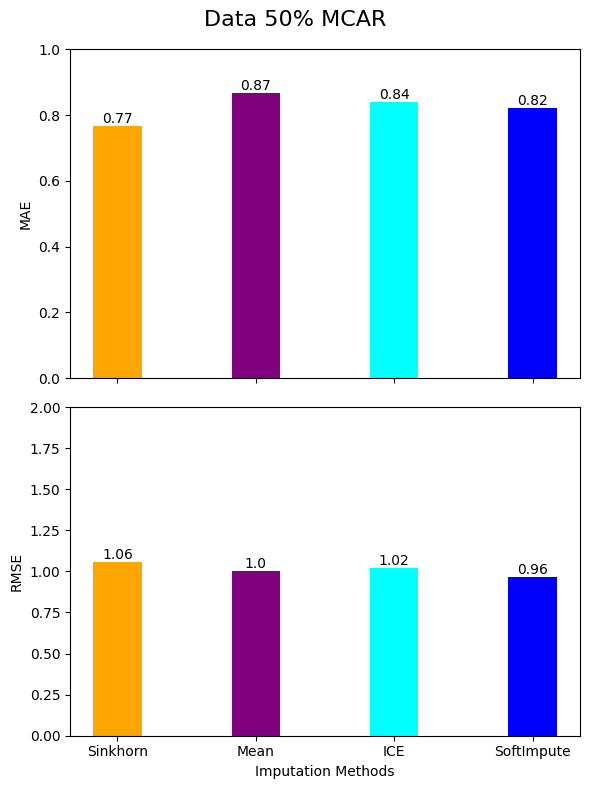

In [ ]:

# Define values and categories
values_mae_mcar50 = [sk_mae_mcar50, mean_mae_mcar50, ice_mae_mcar50, soft_mae_mcar50]
values_rmse_mcar50 = [sk_rmse_mcar50, mean_rmse_mcar50, ice_rmse_mcar50, soft_rmse_mcar50]
categories = ['Sinkhorn', 'Mean', 'ICE', 'SoftImpute']
colors = ['orange', 'purple', 'cyan', 'blue']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  # Index for positioning bars

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 50% MCAR', fontsize=16)

# Plot Mean MAE bars and add values on top
bars1 = ax1.bar(index, values_mae_mcar50, color=colors, width=bar_width)
ax1.set_ylabel("MAE")
ax1.set_ylim(0, 1)  
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot Mean RMSE bars and add values on top
bars2 = ax2.bar(index, values_rmse_mcar50, color=colors, width=bar_width)
ax2.set_ylabel("RMSE")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Label x-axis with categories
ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Imputation Methods')
plt.tight_layout()
plt.show()


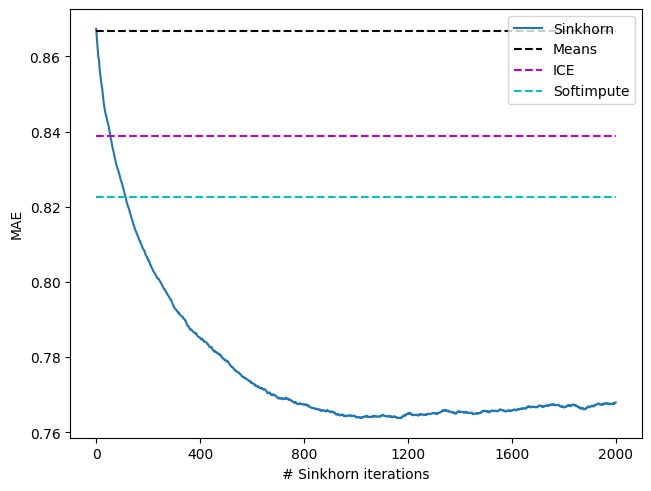

In [73]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_maes50mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_maes50mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_mae_mcar50, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_mae_mcar50, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_mae_mcar50, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('MAE')
plt.legend()
plt.show()

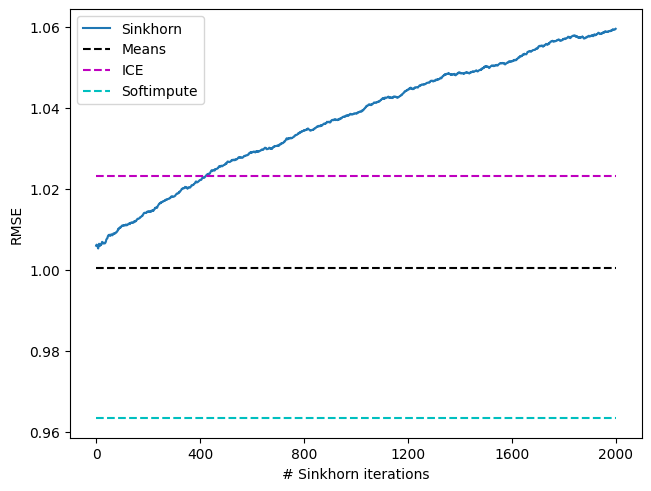

In [74]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_rmses50mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_rmses50mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_rmse_mcar50, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_rmse_mcar50, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_rmse_mcar50, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('RMSE')
plt.legend()
plt.show()

60% MCAR

In [75]:
#sinkhorn
n_mcar60, d_mcar60 = data_mcar60.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar60 = pick_epsilon(data_mcar60)

print(epsilon_mcar60)

sk_imputer_mcar60 = SinkhornImputation(eps=epsilon_mcar60, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mcar60, sk_maes60mcar, sk_rmses60mcar = sk_imputer_mcar60.fit_transform(data_mcar60, verbose=True, report_interval=500, X_true=ground_truth.clone())
#using numpy version of data
sk_imp_mcar60_numpy = sk_imp_mcar60.detach().cpu().numpy()

sk_mae_mcar60 = MAE(sk_imp_mcar60_numpy,ground_truth_numpy ,mask_mcar60)
sk_rmse_mcar60 = RMSE(sk_imp_mcar60_numpy, ground_truth_numpy,mask_mcar60)
print(sk_mae_mcar60,sk_rmse_mcar60)

INFO:root:batchsize = 128, epsilon = 0.2311


0.23114831077200315


INFO:root:Iteration 0:	 Loss: 1.7166	 Validation MAE: 0.8683	RMSE: 1.0095
INFO:root:Iteration 500:	 Loss: 1.2792	 Validation MAE: 0.7874	RMSE: 1.0363
INFO:root:Iteration 1000:	 Loss: 1.4816	 Validation MAE: 0.7741	RMSE: 1.0506
INFO:root:Iteration 1500:	 Loss: 1.5044	 Validation MAE: 0.7725	RMSE: 1.0604


0.7702085698856104 1.0673760961523535


In [76]:
#mean
#using numpy version of data
mean_imp_mcar60 = SimpleImputer().fit_transform(data_mcar60_numpy)
mean_mae_mcar60 = MAE(mean_imp_mcar60, ground_truth_numpy, mask_mcar60)
mean_rmse_mcar60= RMSE(mean_imp_mcar60, ground_truth_numpy, mask_mcar60)
print(mean_mae_mcar60, mean_rmse_mcar60)

#ICE
ice_imp_mcar60 = IterativeImputer(random_state=0, max_iter=500).fit_transform(data_mcar60_numpy)
ice_mae_mcar60 = MAE(ice_imp_mcar60, ground_truth_numpy, mask_mcar60)
ice_rmse_mcar60 = RMSE(ice_imp_mcar60, ground_truth_numpy, mask_mcar60)
print(ice_mae_mcar60,ice_rmse_mcar60)

#SoftImpute
cv_error_mcar60, grid_lambda_mcar60 = cv_softimpute(data_mcar60_numpy, grid_len=15)
lbda_mcar60 = grid_lambda_mcar60[np.argmin(cv_error_mcar60)]
soft_imp_mcar60 = softimpute((data_mcar60_numpy), lbda_mcar60)[1]

soft_mae_mcar60 = MAE(soft_imp_mcar60, ground_truth_numpy, mask_mcar60)
soft_rmse_mcar60 = RMSE(soft_imp_mcar60, ground_truth_numpy, mask_mcar60)
print(soft_mae_mcar60,soft_rmse_mcar60)

0.8681803888134054 1.00569570724524
0.849974900614316 1.0343962985919855
0.8387165983065854 0.9779456169900345


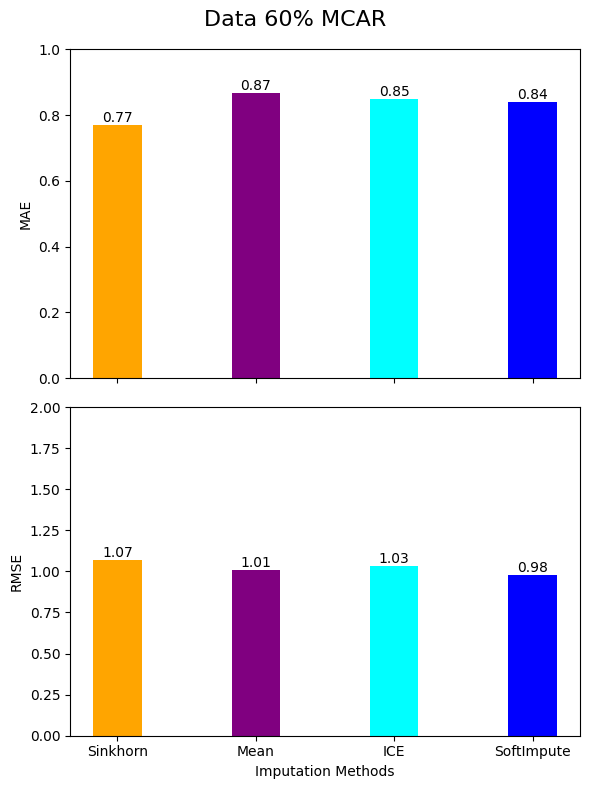

In [ ]:

# Define values and categories
values_mae_mcar60 = [sk_mae_mcar60, mean_mae_mcar60, ice_mae_mcar60, soft_mae_mcar60]
values_rmse_mcar60 = [sk_rmse_mcar60, mean_rmse_mcar60, ice_rmse_mcar60, soft_rmse_mcar60]
categories = ['Sinkhorn', 'Mean', 'ICE', 'SoftImpute']
colors = ['orange', 'purple', 'cyan', 'blue']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  # Index for positioning bars

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 60% MCAR', fontsize=16)

# Plot Mean MAE bars and add values on top
bars1 = ax1.bar(index, values_mae_mcar60, color=colors, width=bar_width)
ax1.set_ylabel("MAE")
ax1.set_ylim(0, 1)  
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot Mean RMSE bars and add values on top
bars2 = ax2.bar(index, values_rmse_mcar60, color=colors, width=bar_width)
ax2.set_ylabel("RMSE")
ax2.set_ylim(0, 2)  
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Label x-axis with categories
ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Imputation Methods')
plt.tight_layout()
plt.show()


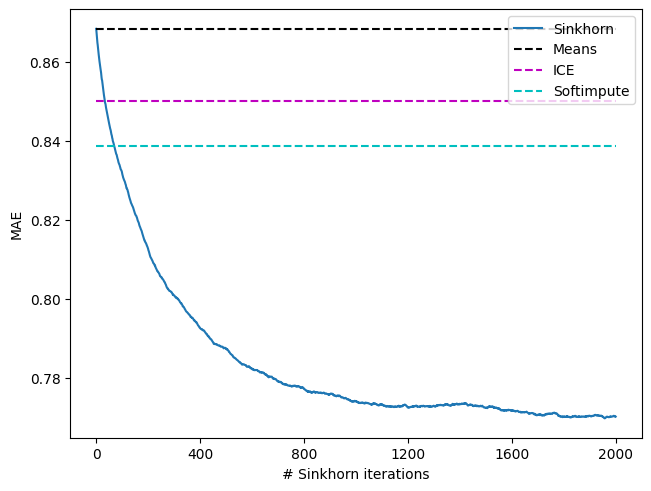

In [78]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_maes60mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_maes60mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_mae_mcar60, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_mae_mcar60, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_mae_mcar60, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('MAE')
plt.legend()
plt.show()

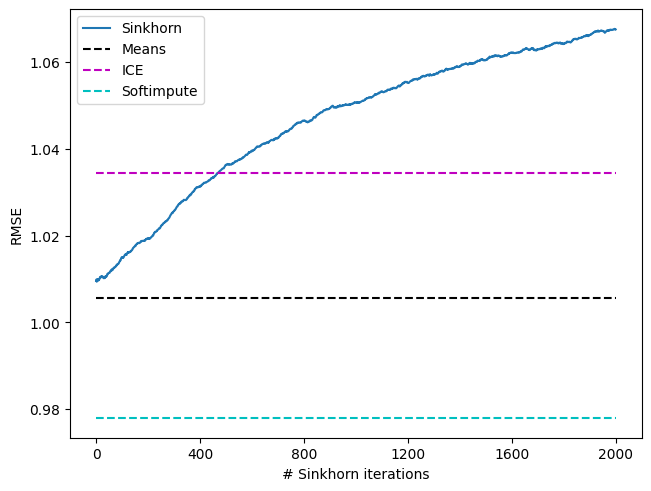

In [79]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_rmses60mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_rmses60mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_rmse_mcar60, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_rmse_mcar60, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_rmse_mcar60, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('RMSE')
plt.legend()
plt.show()

70% MCAR

In [80]:
#sinkhorn
n_mcar70, d_mcar70 = data_mcar70.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar70 = pick_epsilon(data_mcar70)

print(epsilon_mcar70)

sk_imputer_mcar70 = SinkhornImputation(eps=epsilon_mcar70, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mcar70, sk_maes70mcar, sk_rmses70mcar = sk_imputer_mcar70.fit_transform(data_mcar70, verbose=True, report_interval=500, X_true=ground_truth.clone())
#using numpy version of data
sk_imp_mcar70_numpy = sk_imp_mcar70.detach().cpu().numpy()

sk_mae_mcar70 = MAE(sk_imp_mcar70_numpy,ground_truth_numpy ,mask_mcar70)
sk_rmse_mcar70 = RMSE(sk_imp_mcar70_numpy, ground_truth_numpy,mask_mcar70)
print(sk_mae_mcar70,sk_rmse_mcar70)

INFO:root:batchsize = 128, epsilon = 0.1703


0.17027024750436692


INFO:root:Iteration 0:	 Loss: 1.1329	 Validation MAE: 0.8664	RMSE: 1.0098
INFO:root:Iteration 500:	 Loss: 0.9680	 Validation MAE: 0.7929	RMSE: 1.0380
INFO:root:Iteration 1000:	 Loss: 0.9780	 Validation MAE: 0.7783	RMSE: 1.0535
INFO:root:Iteration 1500:	 Loss: 0.8427	 Validation MAE: 0.7746	RMSE: 1.0618


0.7752316717821297 1.069684362973432


In [81]:
#mean
#using numpy version of data
mean_imp_mcar70 = SimpleImputer().fit_transform(data_mcar70_numpy)
mean_mae_mcar70 = MAE(mean_imp_mcar70, ground_truth_numpy, mask_mcar70)
mean_rmse_mcar70= RMSE(mean_imp_mcar70, ground_truth_numpy, mask_mcar70)
print(mean_mae_mcar70, mean_rmse_mcar70)

#ICE
ice_imp_mcar70 = IterativeImputer(random_state=0, max_iter=500).fit_transform(data_mcar70_numpy)
ice_mae_mcar70 = MAE(ice_imp_mcar70, ground_truth_numpy, mask_mcar70)
ice_rmse_mcar70 = RMSE(ice_imp_mcar70, ground_truth_numpy, mask_mcar70)
print(ice_mae_mcar70,ice_rmse_mcar70)

#SoftImpute
cv_error_mcar70, grid_lambda_mcar70 = cv_softimpute(data_mcar70_numpy, grid_len=15)
lbda_mcar70 = grid_lambda_mcar70[np.argmin(cv_error_mcar70)]
soft_imp_mcar70 = softimpute((data_mcar70_numpy), lbda_mcar70)[1]

soft_mae_mcar70 = MAE(soft_imp_mcar70, ground_truth_numpy, mask_mcar70)
soft_rmse_mcar70 = RMSE(soft_imp_mcar70, ground_truth_numpy, mask_mcar70)
print(soft_mae_mcar70,soft_rmse_mcar70)

0.865808974314026 1.0056738984704026
0.8677600005206689 1.0468130148478332
0.8478819503183452 0.9862486769279354


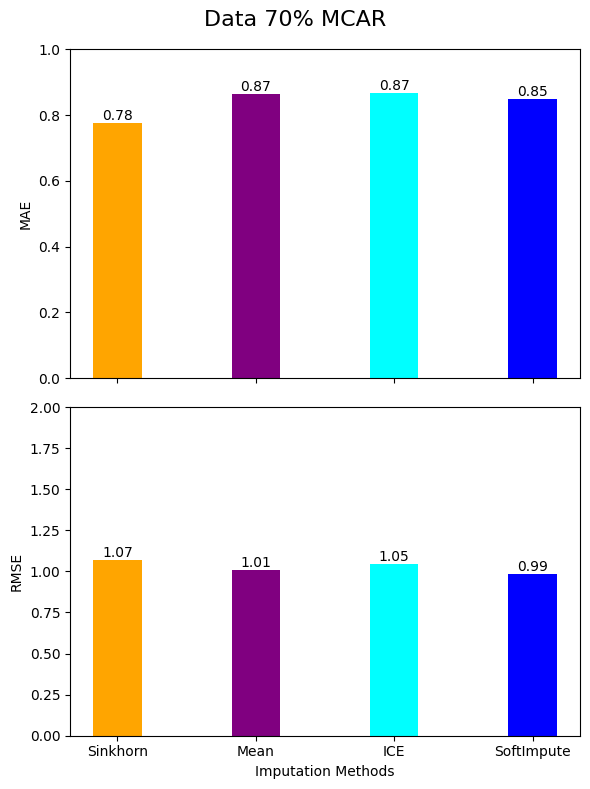

In [ ]:

# Define values and categories
values_mae_mcar70 = [sk_mae_mcar70, mean_mae_mcar70, ice_mae_mcar70, soft_mae_mcar70]
values_rmse_mcar70 = [sk_rmse_mcar70, mean_rmse_mcar70, ice_rmse_mcar70, soft_rmse_mcar70]
categories = ['Sinkhorn', 'Mean', 'ICE', 'SoftImpute']
colors = ['orange', 'purple', 'cyan', 'blue']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  # Index for positioning bars

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 70% MCAR', fontsize=16)

# Plot Mean MAE bars and add values on top
bars1 = ax1.bar(index, values_mae_mcar70, color=colors, width=bar_width)
ax1.set_ylabel("MAE")
ax1.set_ylim(0, 1)  
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot Mean RMSE bars and add values on top
bars2 = ax2.bar(index, values_rmse_mcar70, color=colors, width=bar_width)
ax2.set_ylabel("RMSE")
ax2.set_ylim(0, 2)  
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Label x-axis with categories
ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Imputation Methods')
plt.tight_layout()
plt.show()


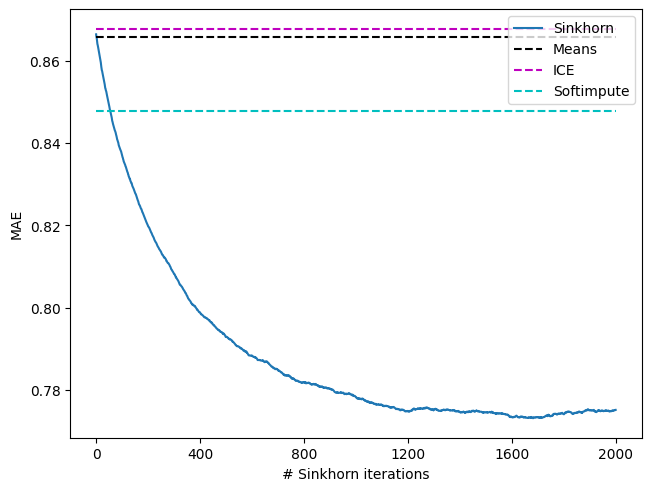

In [83]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_maes70mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_maes70mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_mae_mcar70, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_mae_mcar70, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_mae_mcar70, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('MAE')
plt.legend()
plt.show()

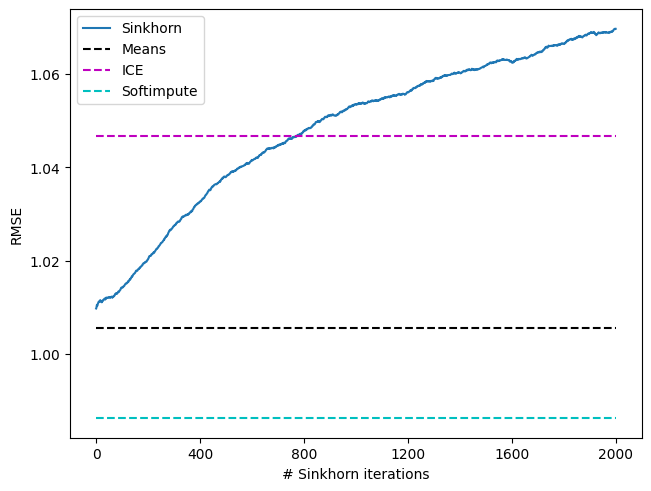

In [84]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_rmses70mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_rmses70mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_rmse_mcar70, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_rmse_mcar70, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_rmse_mcar70, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('RMSE')
plt.legend()
plt.show()

80% MCAR

In [85]:
#sinkhorn
n_mcar80, d_mcar80 = data_mcar80.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar80 = pick_epsilon(data_mcar80)

print(epsilon_mcar80)

sk_imputer_mcar80 = SinkhornImputation(eps=epsilon_mcar80, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mcar80, sk_maes80mcar, sk_rmses80mcar = sk_imputer_mcar80.fit_transform(data_mcar80, verbose=True, report_interval=500, X_true=ground_truth.clone())
#using numpy version of data
sk_imp_mcar80_numpy = sk_imp_mcar80.detach().cpu().numpy()

sk_mae_mcar80 = MAE(sk_imp_mcar80_numpy,ground_truth_numpy ,mask_mcar80)
sk_rmse_mcar80 = RMSE(sk_imp_mcar80_numpy, ground_truth_numpy,mask_mcar80)
print(sk_mae_mcar80,sk_rmse_mcar80)

INFO:root:batchsize = 128, epsilon = 0.1081


0.10807687399224489


INFO:root:Iteration 0:	 Loss: 0.8504	 Validation MAE: 0.8684	RMSE: 1.0093
INFO:root:Iteration 500:	 Loss: 0.6601	 Validation MAE: 0.8072	RMSE: 1.0254
INFO:root:Iteration 1000:	 Loss: 0.7084	 Validation MAE: 0.7877	RMSE: 1.0460
INFO:root:Iteration 1500:	 Loss: 0.7577	 Validation MAE: 0.7816	RMSE: 1.0606


0.7794552536621998 1.0695978425467023


In [86]:
#mean
#using numpy version of data
mean_imp_mcar80 = SimpleImputer().fit_transform(data_mcar80_numpy)
mean_mae_mcar80 = MAE(mean_imp_mcar80, ground_truth_numpy, mask_mcar80)
mean_rmse_mcar80= RMSE(mean_imp_mcar80, ground_truth_numpy, mask_mcar80)
print(mean_mae_mcar80, mean_rmse_mcar80)

#ICE
ice_imp_mcar80 = IterativeImputer(random_state=0, max_iter=500).fit_transform(data_mcar80_numpy)
ice_mae_mcar80 = MAE(ice_imp_mcar80, ground_truth_numpy, mask_mcar80)
ice_rmse_mcar80 = RMSE(ice_imp_mcar80, ground_truth_numpy, mask_mcar80)
print(ice_mae_mcar80,ice_rmse_mcar80)

#SoftImpute
cv_error_mcar80, grid_lambda_mcar80 = cv_softimpute(data_mcar80_numpy, grid_len=15)
lbda_mcar80 = grid_lambda_mcar80[np.argmin(cv_error_mcar80)]
soft_imp_mcar80 = softimpute((data_mcar80_numpy), lbda_mcar80)[1]

soft_mae_mcar80 = MAE(soft_imp_mcar80, ground_truth_numpy, mask_mcar80)
soft_rmse_mcar80 = RMSE(soft_imp_mcar80, ground_truth_numpy, mask_mcar80)
print(soft_mae_mcar80,soft_rmse_mcar80)

0.8666723251161768 1.0034653771293705
0.8685940534864679 1.0319336922107165
0.8540007900555096 0.9916898693042344


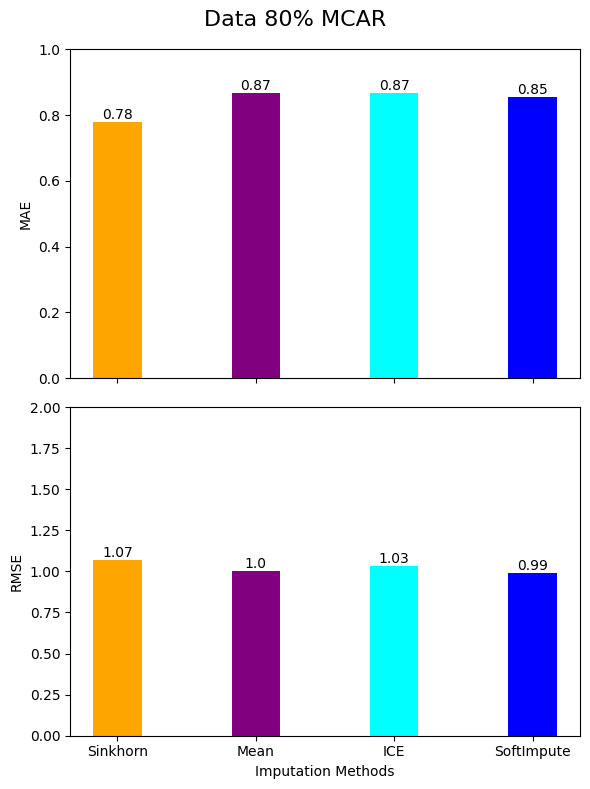

In [ ]:

# Define values and categories
values_mae_mcar80 = [sk_mae_mcar80, mean_mae_mcar80, ice_mae_mcar80, soft_mae_mcar80]
values_rmse_mcar80 = [sk_rmse_mcar80, mean_rmse_mcar80, ice_rmse_mcar80, soft_rmse_mcar80]
categories = ['Sinkhorn', 'Mean', 'ICE', 'SoftImpute']
colors = ['orange', 'purple', 'cyan', 'blue']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  # Index for positioning bars

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 80% MCAR', fontsize=16)

# Plot Mean MAE bars and add values on top
bars1 = ax1.bar(index, values_mae_mcar80, color=colors, width=bar_width)
ax1.set_ylabel("MAE")
ax1.set_ylim(0, 1)  
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot Mean RMSE bars and add values on top
bars2 = ax2.bar(index, values_rmse_mcar80, color=colors, width=bar_width)
ax2.set_ylabel("RMSE")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Label x-axis with categories
ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Imputation Methods')
plt.tight_layout()
plt.show()


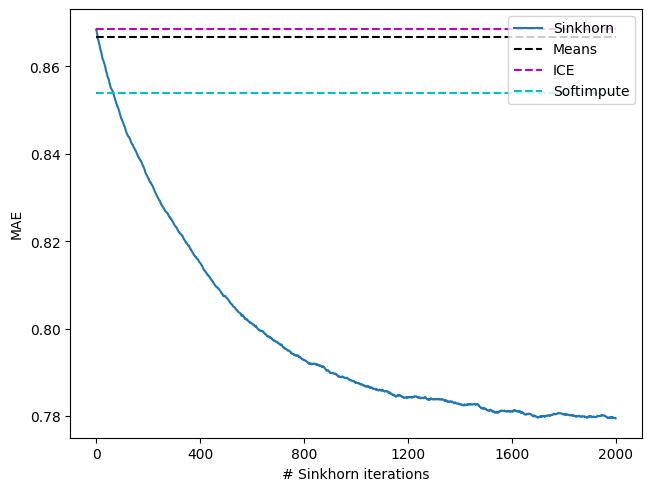

In [88]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_maes80mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_maes80mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_mae_mcar80, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_mae_mcar80, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_mae_mcar80, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('MAE')
plt.legend()
plt.show()

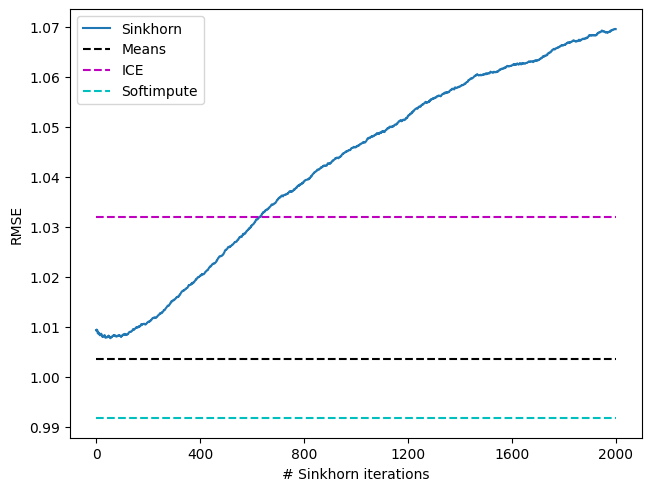

In [89]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_rmses80mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_rmses80mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_rmse_mcar80, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_rmse_mcar80, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_rmse_mcar80, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('RMSE')
plt.legend()
plt.show()

90% MCAR

In [90]:
#sinkhorn
n_mcar90, d_mcar90 = data_mcar90.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar90 = pick_epsilon(data_mcar90)

print(epsilon_mcar90)

sk_imputer_mcar90 = SinkhornImputation(eps=epsilon_mcar90, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mcar90, sk_maes90mcar, sk_rmses90mcar = sk_imputer_mcar90.fit_transform(data_mcar90, verbose=True, report_interval=500, X_true=ground_truth.clone())
#using numpy version of data
sk_imp_mcar90_numpy = sk_imp_mcar90.detach().cpu().numpy()

sk_mae_mcar90 = MAE(sk_imp_mcar90_numpy,ground_truth_numpy ,mask_mcar90)
sk_rmse_mcar90 = RMSE(sk_imp_mcar90_numpy, ground_truth_numpy,mask_mcar90)
print(sk_mae_mcar90,sk_rmse_mcar90)

INFO:root:batchsize = 128, epsilon = 0.0510


0.05102379201909575


INFO:root:Iteration 0:	 Loss: 0.4921	 Validation MAE: 0.8654	RMSE: 1.0078
INFO:root:Iteration 500:	 Loss: 0.2760	 Validation MAE: 0.8323	RMSE: 1.0154
INFO:root:Iteration 1000:	 Loss: 0.3868	 Validation MAE: 0.8175	RMSE: 1.0307
INFO:root:Iteration 1500:	 Loss: 0.3513	 Validation MAE: 0.8118	RMSE: 1.0426


0.8107545295550889 1.0528325354159147


In [91]:
#mean
#using numpy version of data
mean_imp_mcar90 = SimpleImputer().fit_transform(data_mcar90_numpy)
mean_mae_mcar90 = MAE(mean_imp_mcar90, ground_truth_numpy, mask_mcar90)
mean_rmse_mcar90= RMSE(mean_imp_mcar90, ground_truth_numpy, mask_mcar90)
print(mean_mae_mcar90, mean_rmse_mcar90)

#ICE
ice_imp_mcar90 = IterativeImputer(random_state=0, max_iter=500).fit_transform(data_mcar90_numpy)
ice_mae_mcar90 = MAE(ice_imp_mcar90, ground_truth_numpy, mask_mcar90)
ice_rmse_mcar90 = RMSE(ice_imp_mcar90, ground_truth_numpy, mask_mcar90)
print(ice_mae_mcar90,ice_rmse_mcar90)

#SoftImpute
cv_error_mcar90, grid_lambda_mcar90 = cv_softimpute(data_mcar90_numpy, grid_len=15)
lbda_mcar90 = grid_lambda_mcar90[np.argmin(cv_error_mcar90)]
soft_imp_mcar90 = softimpute((data_mcar90_numpy), lbda_mcar90)[1]

soft_mae_mcar90 = MAE(soft_imp_mcar90, ground_truth_numpy, mask_mcar90)
soft_rmse_mcar90 = RMSE(soft_imp_mcar90, ground_truth_numpy, mask_mcar90)
print(soft_mae_mcar90,soft_rmse_mcar90)

0.8642017550423008 1.0027826316152388
0.8732341204760882 1.019473492125315
0.8665289802518099 1.0013600939765994


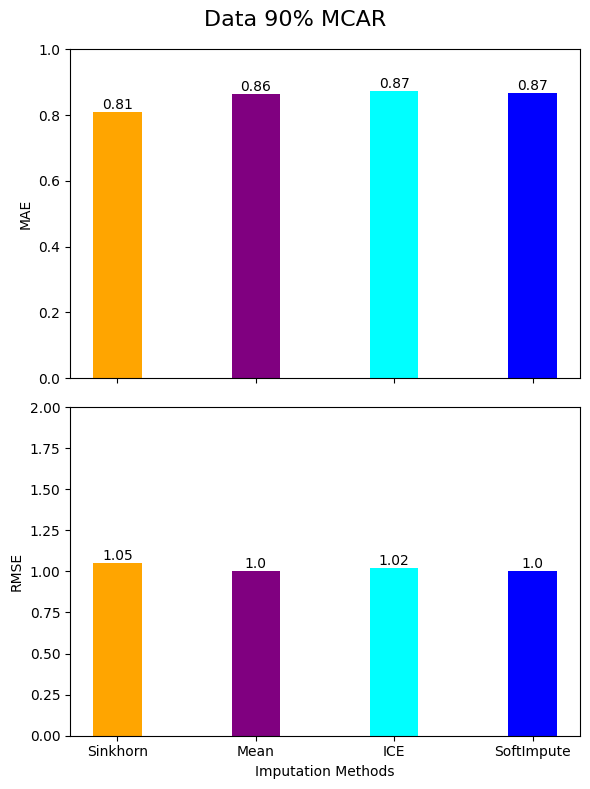

In [ ]:

# Define values and categories
values_mae_mcar90 = [sk_mae_mcar90, mean_mae_mcar90, ice_mae_mcar90, soft_mae_mcar90]
values_rmse_mcar90 = [sk_rmse_mcar90, mean_rmse_mcar90, ice_rmse_mcar90, soft_rmse_mcar90]
categories = ['Sinkhorn', 'Mean', 'ICE', 'SoftImpute']
colors = ['orange', 'purple', 'cyan', 'blue']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  # Index for positioning bars

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 90% MCAR', fontsize=16)

# Plot Mean MAE bars and add values on top
bars1 = ax1.bar(index, values_mae_mcar90, color=colors, width=bar_width)
ax1.set_ylabel("MAE")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot Mean RMSE bars and add values on top
bars2 = ax2.bar(index, values_rmse_mcar90, color=colors, width=bar_width)
ax2.set_ylabel("RMSE")
ax2.set_ylim(0, 2)  
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Label x-axis with categories
ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Imputation Methods')
plt.tight_layout()
plt.show()


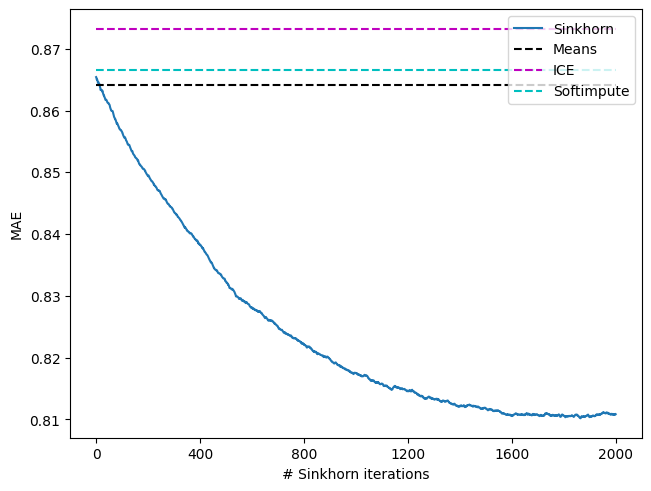

In [93]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_maes90mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_maes90mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_mae_mcar90, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_mae_mcar90, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_mae_mcar90, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('MAE')
plt.legend()
plt.show()

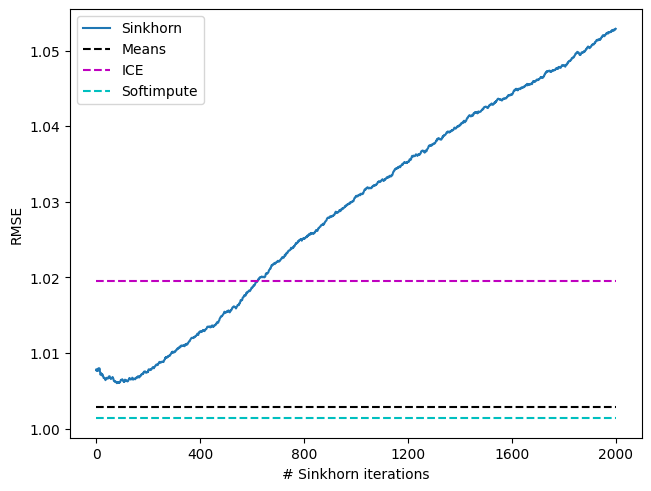

In [94]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_rmses90mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_rmses90mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_rmse_mcar90, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_rmse_mcar90, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_rmse_mcar90, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('RMSE')
plt.legend()
plt.show()

95% MCAR

In [95]:
#sinkhorn
n_mcar95, d_mcar95 = data_mcar95.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar95 = pick_epsilon(data_mcar95)

print(epsilon_mcar95)

sk_imputer_mcar95 = SinkhornImputation(eps=epsilon_mcar95, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mcar95, sk_maes95mcar, sk_rmses95mcar = sk_imputer_mcar95.fit_transform(data_mcar95, verbose=True, report_interval=500, X_true=ground_truth.clone())
#using numpy version of data
sk_imp_mcar95_numpy = sk_imp_mcar95.detach().cpu().numpy()

sk_mae_mcar95 = MAE(sk_imp_mcar95_numpy,ground_truth_numpy ,mask_mcar95)
sk_rmse_mcar95 = RMSE(sk_imp_mcar95_numpy, ground_truth_numpy,mask_mcar95)
print(sk_mae_mcar95,sk_rmse_mcar95)

INFO:root:batchsize = 128, epsilon = 0.0305


0.03050400082366511


INFO:root:Iteration 0:	 Loss: 0.2097	 Validation MAE: 0.8690	RMSE: 1.0106
INFO:root:Iteration 500:	 Loss: 0.1585	 Validation MAE: 0.8578	RMSE: 1.0167
INFO:root:Iteration 1000:	 Loss: 0.1417	 Validation MAE: 0.8515	RMSE: 1.0328
INFO:root:Iteration 1500:	 Loss: 0.1638	 Validation MAE: 0.8487	RMSE: 1.0462


0.8496041744486235 1.0587657744278778


In [96]:
#mean
#using numpy version of data
mean_imp_mcar95 = SimpleImputer().fit_transform(data_mcar95_numpy)
mean_mae_mcar95 = MAE(mean_imp_mcar95, ground_truth_numpy, mask_mcar95)
mean_rmse_mcar95 = RMSE(mean_imp_mcar95, ground_truth_numpy, mask_mcar95)
print(mean_mae_mcar95, mean_rmse_mcar95)

#ICE
ice_imp_mcar95 = IterativeImputer(random_state=0, max_iter=500).fit_transform(data_mcar95_numpy)
ice_mae_mcar95 = MAE(ice_imp_mcar95, ground_truth_numpy, mask_mcar95)
ice_rmse_mcar95 = RMSE(ice_imp_mcar95, ground_truth_numpy, mask_mcar95)
print(ice_mae_mcar95,ice_rmse_mcar95)

#SoftImpute
cv_error_mcar95, grid_lambda_mcar95 = cv_softimpute(data_mcar95_numpy, grid_len=15)
lbda_mcar95 = grid_lambda_mcar95[np.argmin(cv_error_mcar95)]
soft_imp_mcar95 = softimpute((data_mcar95_numpy), lbda_mcar95)[1]

soft_mae_mcar95 = MAE(soft_imp_mcar95, ground_truth_numpy, mask_mcar95)
soft_rmse_mcar95 = RMSE(soft_imp_mcar95, ground_truth_numpy, mask_mcar95)
print(soft_mae_mcar95,soft_rmse_mcar95)

0.8685598309504396 1.0056355771190795
0.877912093356988 1.0204625237931293
0.8691877369647518 1.0097097105662378


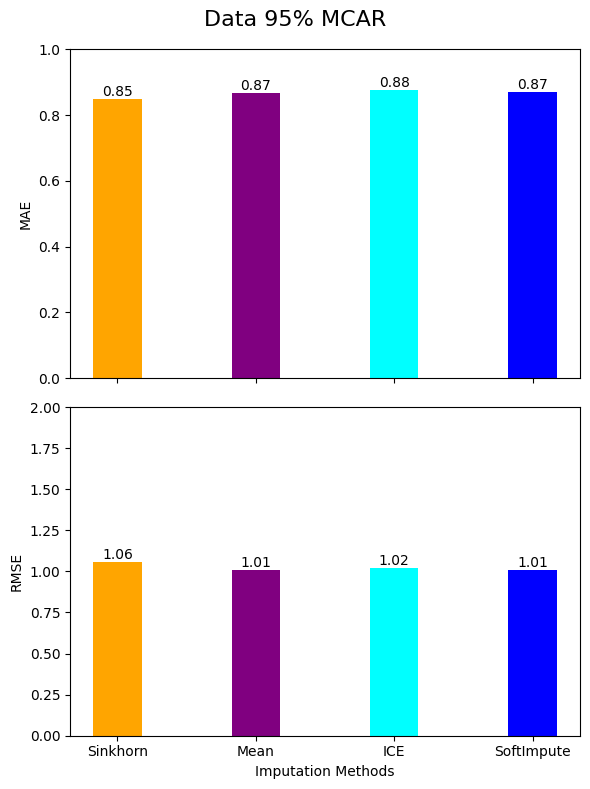

In [ ]:

# Define values and categories
values_mae_mcar95 = [sk_mae_mcar95, mean_mae_mcar95, ice_mae_mcar95, soft_mae_mcar95]
values_rmse_mcar95 = [sk_rmse_mcar95, mean_rmse_mcar95, ice_rmse_mcar95, soft_rmse_mcar95]
categories = ['Sinkhorn', 'Mean', 'ICE', 'SoftImpute']
colors = ['orange', 'purple', 'cyan', 'blue']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  # Index for positioning bars

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 95% MCAR', fontsize=16)

# Plot Mean MAE bars and add values on top
bars1 = ax1.bar(index, values_mae_mcar95, color=colors, width=bar_width)
ax1.set_ylabel("MAE")
ax1.set_ylim(0, 1)  
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot Mean RMSE bars and add values on top
bars2 = ax2.bar(index, values_rmse_mcar95, color=colors, width=bar_width)
ax2.set_ylabel("RMSE")
ax2.set_ylim(0, 2)  
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Label x-axis with categories
ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Imputation Methods')
plt.tight_layout()
plt.show()


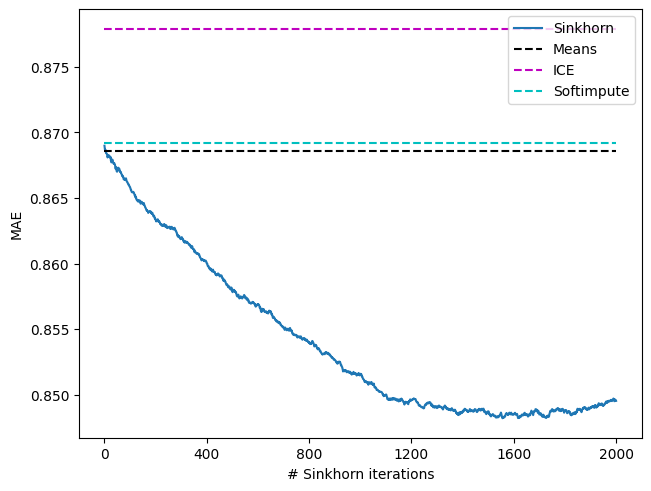

In [98]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_maes95mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_maes95mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_mae_mcar95, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_mae_mcar95, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_mae_mcar95, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('MAE')
plt.legend()
plt.show()

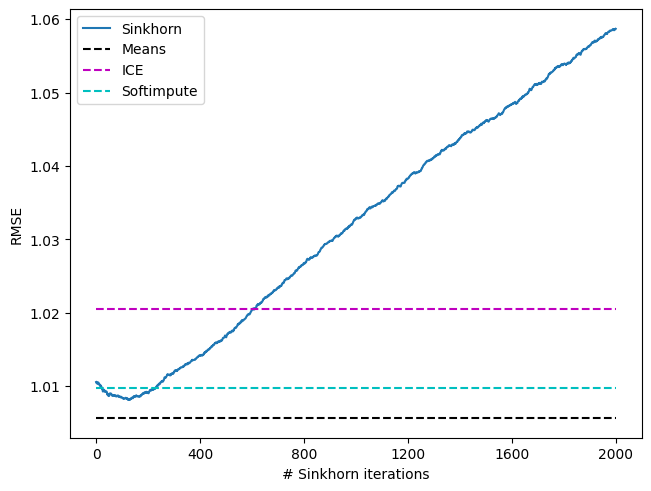

In [99]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_rmses95mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_rmses95mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.hlines(y=mean_rmse_mcar95, xmin=0, xmax=npoints, label="Means", ls = '--', color='black')
ax.hlines(y=ice_rmse_mcar95, xmin=0, xmax=npoints, label="ICE", ls = '--', color='m')
ax.hlines(y=soft_rmse_mcar95, xmin=0, xmax=npoints, label="Softimpute", ls = '--', color='c')

ax.set_ylabel('RMSE')
plt.legend()
plt.show()

100% MCAR

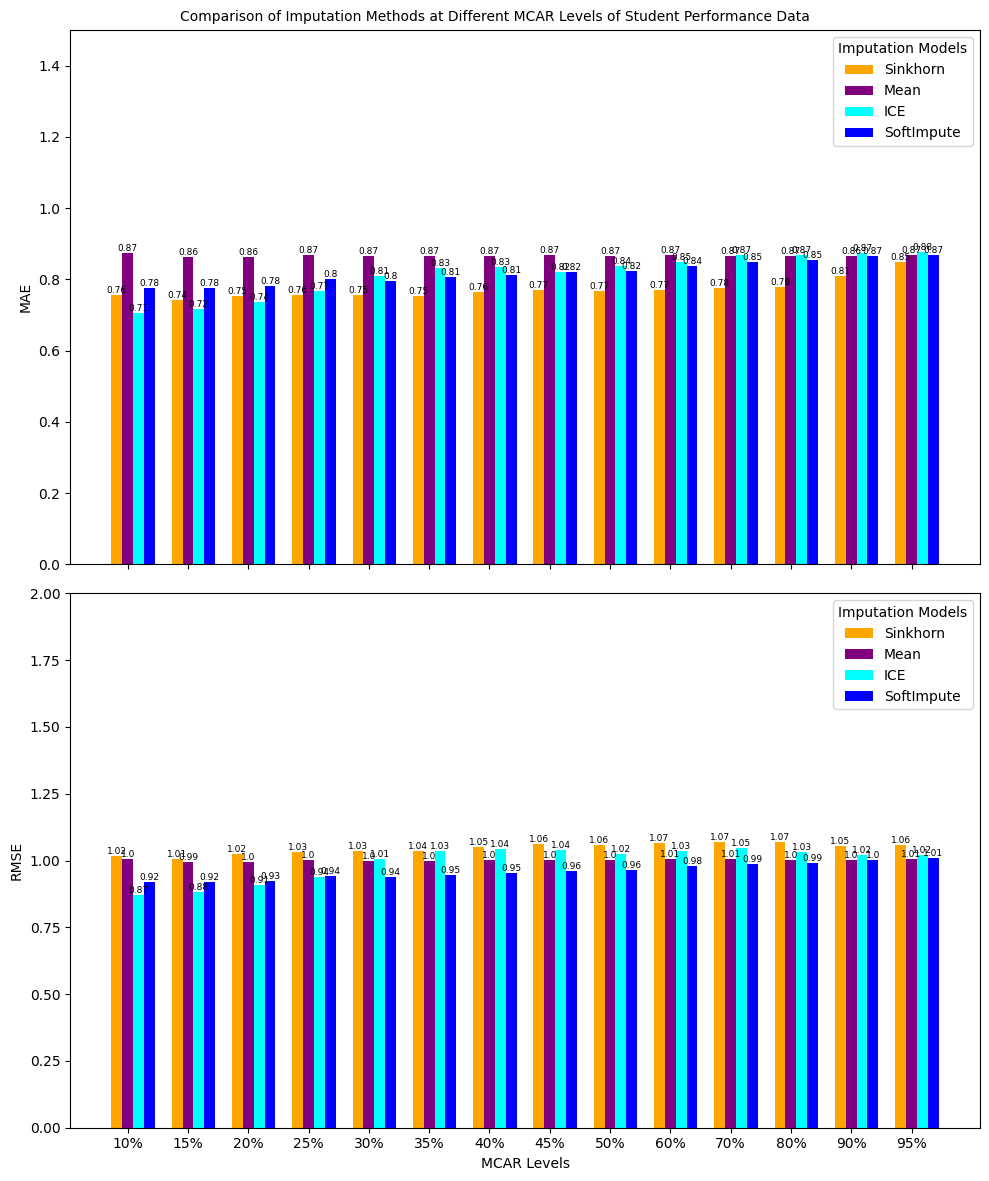

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define your MAE and RMSE data
sk_mcar_mae = [sk_mae_mcar10, sk_mae_mcar15, sk_mae_mcar20, sk_mae_mcar25, sk_mae_mcar30,sk_mae_mcar35,sk_mae_mcar40,sk_mae_mcar45,sk_mae_mcar50,sk_mae_mcar60,sk_mae_mcar70,sk_mae_mcar80,sk_mae_mcar90,sk_mae_mcar95]
mean_mcar_mae = [mean_mae_mcar10, mean_mae_mcar15, mean_mae_mcar20, mean_mae_mcar25, mean_mae_mcar30,mean_mae_mcar35,mean_mae_mcar40,mean_mae_mcar45,mean_mae_mcar50,mean_mae_mcar60,mean_mae_mcar70,mean_mae_mcar80,mean_mae_mcar90,mean_mae_mcar95]
ice_mcar_mae = [ice_mae_mcar10, ice_mae_mcar15, ice_mae_mcar20, ice_mae_mcar25, ice_mae_mcar30,ice_mae_mcar35,ice_mae_mcar40,ice_mae_mcar45,ice_mae_mcar50,ice_mae_mcar60,ice_mae_mcar70,ice_mae_mcar80,ice_mae_mcar90,ice_mae_mcar95]
soft_mcar_mae = [soft_mae_mcar10, soft_mae_mcar15, soft_mae_mcar20, soft_mae_mcar25, soft_mae_mcar30,soft_mae_mcar35,soft_mae_mcar40,soft_mae_mcar45,soft_mae_mcar50,soft_mae_mcar60,soft_mae_mcar70,soft_mae_mcar80,soft_mae_mcar90,soft_mae_mcar95]

sk_mcar_rmse = [sk_rmse_mcar10, sk_rmse_mcar15, sk_rmse_mcar20, sk_rmse_mcar25, sk_rmse_mcar30,sk_rmse_mcar35,sk_rmse_mcar40,sk_rmse_mcar45,sk_rmse_mcar50,sk_rmse_mcar60,sk_rmse_mcar70,sk_rmse_mcar80,sk_rmse_mcar90,sk_rmse_mcar95]
mean_mcar_rmse = [mean_rmse_mcar10, mean_rmse_mcar15, mean_rmse_mcar20, mean_rmse_mcar25, mean_rmse_mcar30,mean_rmse_mcar35,mean_rmse_mcar40,mean_rmse_mcar45,mean_rmse_mcar50,mean_rmse_mcar60,mean_rmse_mcar70,mean_rmse_mcar80,mean_rmse_mcar90,mean_rmse_mcar95]
ice_mcar_rmse = [ice_rmse_mcar10, ice_rmse_mcar15, ice_rmse_mcar20, ice_rmse_mcar25, ice_rmse_mcar30,ice_rmse_mcar35,ice_rmse_mcar40,ice_rmse_mcar45,ice_rmse_mcar50,ice_rmse_mcar60,ice_rmse_mcar70,ice_rmse_mcar80,ice_rmse_mcar90,ice_rmse_mcar95]
soft_mcar_rmse = [soft_rmse_mcar10, soft_rmse_mcar15, soft_rmse_mcar20, soft_rmse_mcar25, soft_rmse_mcar30,soft_rmse_mcar35,soft_rmse_mcar40,soft_rmse_mcar45,soft_rmse_mcar50,soft_rmse_mcar60,soft_rmse_mcar70,soft_rmse_mcar80,soft_rmse_mcar90,soft_rmse_mcar95]

# Combine the MAE and RMSE data for each MCAR level
values_mae = [sk_mcar_mae, mean_mcar_mae, ice_mcar_mae, soft_mcar_mae]
values_rmse = [sk_mcar_rmse, mean_mcar_rmse, ice_mcar_rmse, soft_mcar_rmse]

# Define categories, x-axis labels, and colors
categories = ['10%', '15%', '20%', '25%', '30%','35%','40%','45%','50%','60%','70%','80%','90%','95%']
colors = ['orange', 'purple', 'cyan', 'blue']  # Yellow for Sinkhorn, purple for Mean, cyan for ICE, blue for SoftImpute
imputation_models = ['Sinkhorn', 'Mean', 'ICE', 'SoftImpute']
num_methods = len(categories)
bar_width = 0.18  # Width of each bar
x = np.arange(num_methods)  

# Create subplots for MAE and RMSE
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)
fig.suptitle('Comparison of Imputation Methods at Different MCAR Levels of Student Performance Data', fontsize=10)

# Plot MAE bars for each MCAR level 
for i, (mcar, mae_values, color) in enumerate(zip(imputation_models, values_mae, colors)):
    ax1.bar(x + i * bar_width, mae_values, bar_width, label=mcar, color=color)

# Customize MAE plot
ax1.set_ylabel("MAE")
ax1.set_ylim(0, 1.5)  
ax1.set_xticks(x + bar_width)  
ax1.set_xticklabels(categories)
ax1.legend(title="Imputation Models")

# Add values on top of MAE bars
for i, mae_values in enumerate(values_mae):
    for j, value in enumerate(mae_values):
        ax1.text(j + i * bar_width, value, round(value, 2), ha='center', va='bottom', fontsize=6.5)

# Plot RMSE bars for each MCAR level 
for i, (mcar, rmse_values, color) in enumerate(zip(imputation_models, values_rmse, colors)):
    ax2.bar(x + i * bar_width, rmse_values, bar_width, label=mcar, color=color)

# Customize RMSE plot
ax2.set_ylabel("RMSE")
ax2.set_ylim(0, 2)  
ax2.set_xticks(x + bar_width)  
ax2.set_xticklabels(categories)
ax2.legend(title="Imputation Models")

# Add values on top of RMSE bars
for i, rmse_values in enumerate(values_rmse):
    for j, value in enumerate(rmse_values):
        ax2.text(j + i * bar_width, value, round(value, 2), ha='center', va='bottom', fontsize=6.5)

# Show the plot
plt.xlabel('MCAR Levels')
plt.tight_layout()
plt.show()
